# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## **1. Prerequisite**
This section provides some basic steps for accessing and visualizing the dataset.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_raw_array = np.zeros(shape=(len(data), 2304))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image_raw = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image_raw, (48, 48))
        image_array[i] = image
        image_raw_array[i] = image_raw
        
    return image_raw_array, image_array, image_label

In [4]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [5]:
## load dataset here
df = pd.read_csv("/kaggle/input/project-dataset/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [10]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 35887 entries, 0 to 35886

Data columns (total 2 columns):

 #   Column   Non-Null Count  Dtype 

---  ------   --------------  ----- 

 0   emotion  35887 non-null  int64 

 1   pixels   35887 non-null  object

dtypes: int64(1), object(1)

memory usage: 560.9+ KB


The provided data doesn't have any missing value.

In [6]:
# check and drop duplicate values 
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)

In [7]:
df['emotion'].value_counts()

emotion
3    8800
6    6057
4    5934
2    4835
0    4740
5    3267
1     461
Name: count, dtype: int64

There is a huge difference between the number of labels 1 and other labels, from 10-20 times

### EDA

In [ ]:
## load dataset here
df = pd.read_csv("../data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
# check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


Dữ liệu đã cho không có giá trị thiếu

In [ ]:
# check and drop duplicate values 
print(f"Number duplicated values: {df.duplicated().value_counts().get(key=True)}")
df.drop_duplicates(inplace=True)

Number duplicated values: 1793


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34094 entries, 0 to 35885
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  34094 non-null  int64 
 1   pixels   34094 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
# Tính tần suất xuất hiện của mỗi giá trị trong 'df['emotion']'
emotion_counts = df['emotion'].value_counts()
emotion_counts

emotion
3    8800
6    6057
4    5934
2    4835
0    4740
5    3267
1     461
Name: count, dtype: int64

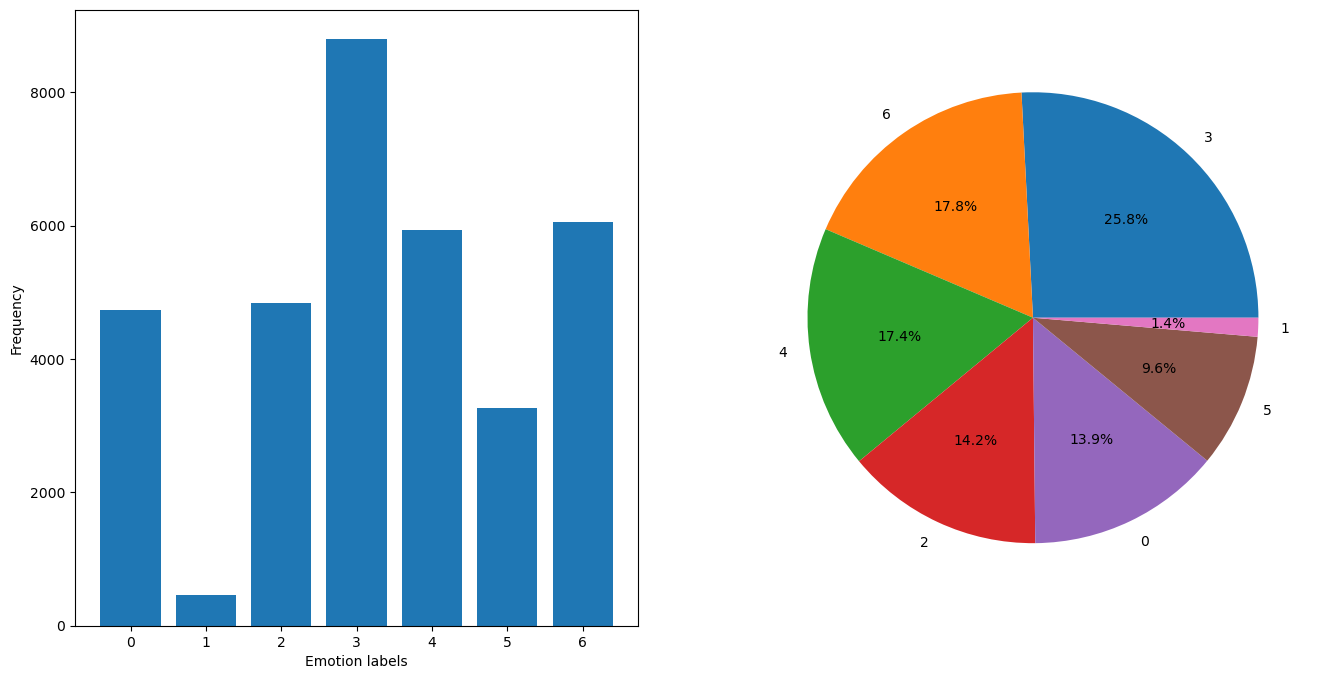

In [ ]:
plt.figure(figsize=(16, 8))

# Cài đặt subplot 1,2
plt.subplot(1, 2, 1)

# Vẽ biểu đồ cột
plt.bar(emotion_counts.index, emotion_counts.values)
plt.xlabel('Emotion labels')
plt.ylabel('Frequency')

# Cài đặt subplot 2,2
plt.subplot(1, 2, 2)

# Vẽ biểu đồ tròn
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct="%1.1f%%")

plt.show()


Có sự mất cân bằng giữa các labels trong tập dữ liệu được cho:  
- Số lượng label 3 (Happy) quá nhiều, gần như nhiều hơn hai lần so với các lable khác   
- Trong khi đó, số lượng label 1 (Disgust) quá ít, chiếm khoảng 1.4% của tập dữ liệu  

Điều này có thể dẫn đến việc:  
- Các thuật toán phân loại học từ dữ liệu mất cân bằng có xu hướng thiên vị về phía nhóm đa số (trong trường hợp này là label 3).  
- Các chỉ số đánh giá hiệu suất mô hình thông thường, như độ chính xác (accuracy), có thể bị bóp méo bởi sự mất cân bằng nhãn...

### Parsing data

In [8]:
## parsing data here
image_raws, images, labels = parse_data(df)

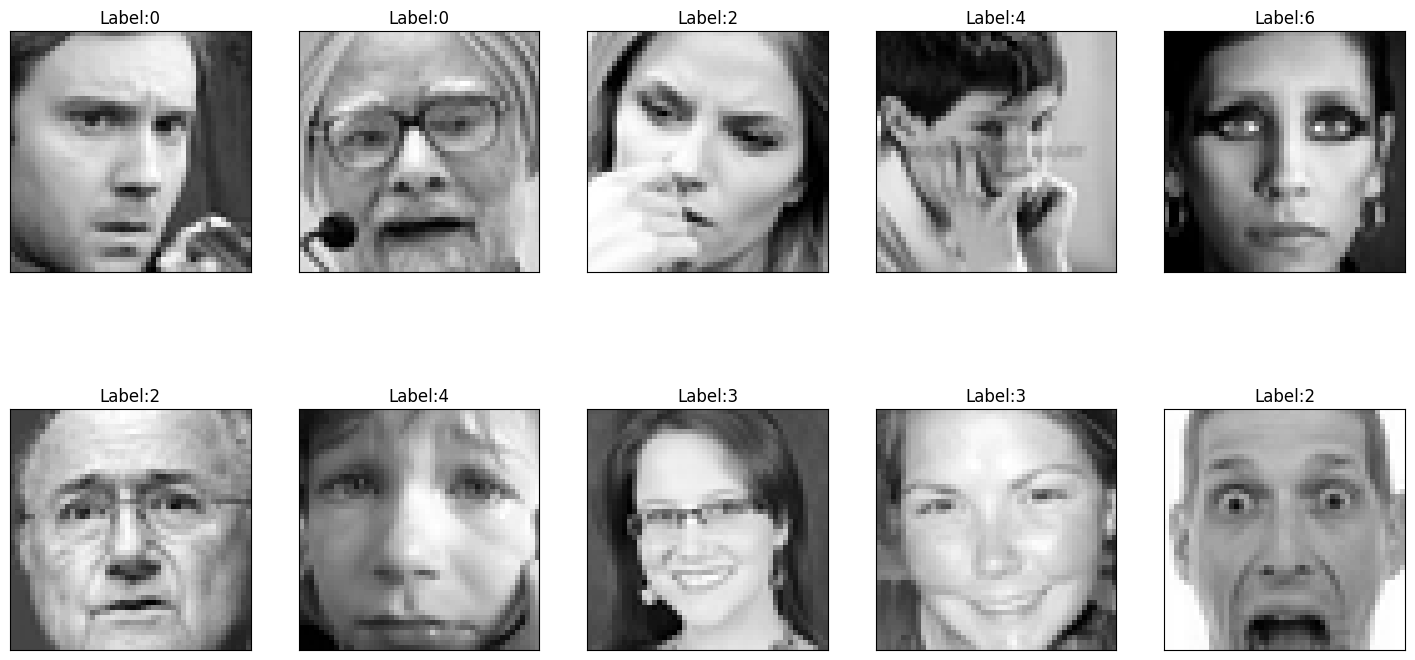

In [9]:
## showing images here
show_img(images, labels)

## **2. Principle Component Analysis**

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

### Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
# check data shape
image_raws.shape

(34094, 2304)

Perform PCA on the 2-dimensional matrix image_raws with 35887 rows corresponding to 35887 image data, 2304 columns corresponding to the value of 48x48 pixels when reshaped into a 1-dimensional array

In [ ]:
# normalize data images
import tensorflow as tf 
norm_images = tf.keras.utils.normalize(image_raws)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(norm_images) 

PCA(n_components=2)

In [ ]:
## transform for visualizing here
images_pca=pca.transform(norm_images) ## modify images' array to the appropriate shape
images_pca.shape

(34094, 2)

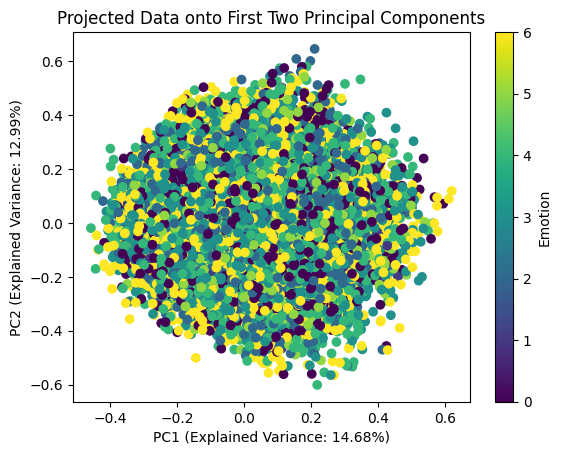

In [ ]:
principal_components = pca.components_
projected_data = norm_images.dot(principal_components.T)

import matplotlib.pyplot as plt

# Scatter plot of projected data
scatter = plt.scatter(projected_data[:, 0], projected_data[:, 1], c=labels, cmap="viridis")
cbar = plt.colorbar(scatter, ticks = range(len(np.unique(labels))), label="Emotion")

# Label axes based on explained variance ratio (optional)
plt.xlabel("PC1 (Explained Variance: {:.2f}%)".format(pca.explained_variance_ratio_[0] * 100))
plt.ylabel("PC2 (Explained Variance: {:.2f}%)".format(pca.explained_variance_ratio_[1] * 100))

plt.title("Projected Data onto First Two Principal Components")
plt.show()

In [ ]:
pca.explained_variance_ratio_.sum()

0.27665290359443273

After reducing the dimensionality of the data set using PCA with n_components = 2, we retain about 27.66% of the information (about variance) from the original data set. This could be considered low, suggesting that we need a larger number of principal components to capture more variance or that the data set is highly dimensional.

### Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

Determining the optimal number of principal components (PCs) in Principal Component Analysis (PCA) is an important step for effective data dimensionality reduction. Choosing the appropriate number of PCs helps balance between retaining the most important information from the original data and minimizing noise and redundancy.

A common method for determining the optimal number of PCs is to use a combination of visual and quantitative analysis based on the explained_variance_ variable of PCA. Here are the steps:

- Step 1: Fit PCA model

In [ ]:
pca = PCA()
pca.fit(norm_images)

PCA()

- Step 2: Explained variance ratio

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

- Step 3: Create a scree plot to visualize the explained variance

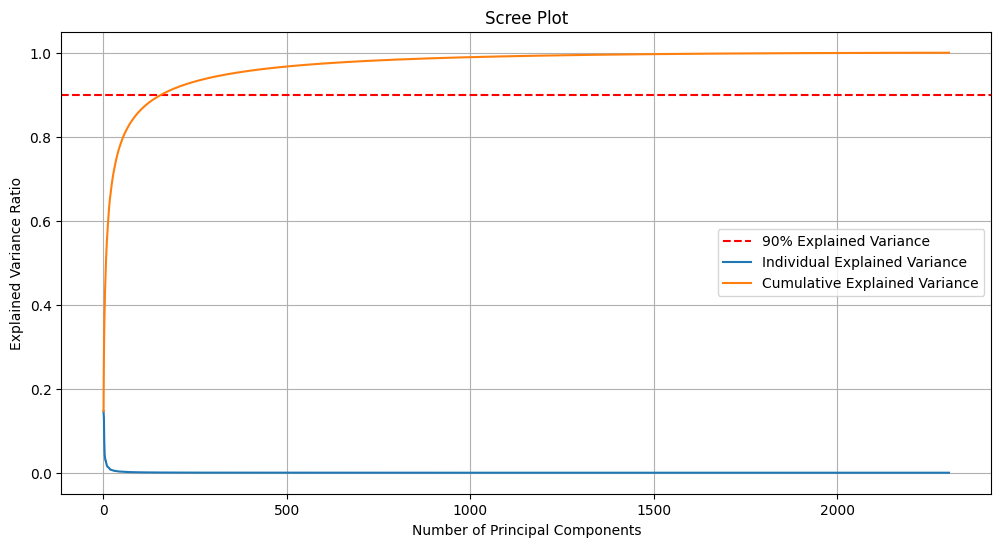

In [ ]:
plt.figure(figsize=(12, 6))
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Explained Variance')
# plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
# plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='x', label='Cumulative Explained Variance')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, label='Cumulative Explained Variance')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.grid(True)
plt.show()



- Step 4: Determine the "Elbow" Point

Based on the Scree Plot chart, the elbow point can be located at about 150-175 PCs, corresponding to 90% information about the variance of the original data. Therefore, choosing 150-175 PCs may be the optimal number of main components for this case.

- Step 5: Threshold Method  

In [ ]:
# Optimal number of components based on explained variance threshold (e.g., 90%)
optimal_components = next(i for i, total_var in enumerate(cumulative_explained_variance) if total_var >= 0.9) + 1
print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 158


Another way to find the number of principal components is to use the threshold method. Setting the cumulative variance threshold at 90%, we find the optimal number of principal components to be 158.

**Selection Process Explained**

1. Scree Plot and "Elbow" Method: The scree plot shows the explained variance of each principal component. The "elbow" point, where the explained variance curve starts to flatten, indicates diminishing returns for adding more components. This point is chosen as the optimal number of components because it captures most of the variance while avoiding unnecessary complexity.
2. Cumulative Variance Threshold: This method sets a threshold for the cumulative explained variance (e.g., 80% or 90%). The optimal number of components is the smallest number that meets or exceeds this threshold, ensuring that a sufficient amount of variance is captured.  

By using both the scree plot and the cumulative variance threshold, can make a well-informed decision on the optimal number of principal components for your analysis.

## **3. Image Classification**

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

Load modules

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

### PCA with 158 principal components

In [11]:
pca = PCA(n_components=158)
images_pca = pca.fit_transform(image_raws)
images_pca.shape

(34094, 158)

In [12]:
### split data into train/val/test subsets here
from sklearn.model_selection import train_test_split

def split_data(X, y):
    train_ratio = 0.75
    validation_ratio = 0.15
    test_ratio = 0.10

    # train is now 75% of the entire data set
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=101)

    # test is now 10% of the initial data set
    # validation is now 15% of the initial data set
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=101) 
    return (x_train, x_test, x_val, y_train, y_test, y_val)

In [13]:
x_train_norm, x_test_norm, x_val_norm, y_train_norm, y_test_norm, y_val_norm = split_data(image_raws, labels)
print("On the original normalized data set")
print(f"- training set shape: {x_train_norm.shape}")
print(f"- testing set shape: {x_test_norm.shape}")
print(f"- valid set shape: {x_val_norm.shape}")

On the original normalized data set
- training set shape: (25570, 2304)
- testing set shape: (3410, 2304)
- valid set shape: (5114, 2304)


In [14]:
x_train_pca, x_test_pca, x_val_pca, y_train_pca, y_test_pca, y_val_pca = split_data(images_pca, labels)
print("On the transformed data set")
print(f"- training set shape: {x_train_pca.shape}")
print(f"- testing set shape: {x_test_pca.shape}")
print(f"- valid set shape: {x_val_pca.shape}")

On the transformed data set
- training set shape: (25570, 158)
- testing set shape: (3410, 158)
- valid set shape: (5114, 158)


### Split data into train/val/test subsets

In [ ]:
def split_data(X, y):
    train_ratio = 0.75
    validation_ratio = 0.15
    test_ratio = 0.10

    # train is now 75% of the entire data set
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, random_state=101)

    # test is now 10% of the initial data set
    # validation is now 15% of the initial data set
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=101) 
    return (x_train, x_test, x_val, y_train, y_test, y_val)


def draw_emotion_distribution(y_train, y_test, y_val):
    # Vẽ biểu đồ cột phân phối giá trị emotion labels trên subplots (1, 3).

    # Tính tần suất xuất hiện của mỗi giá trị emotion label
    train_counts = pd.Series(y_train).value_counts()
    test_counts = pd.Series(y_test).value_counts()
    val_counts = pd.Series(y_val).value_counts()

    # Cài đặt subplot 1,3
    plt.figure(figsize=(15, 6))

    # Vẽ biểu đồ cột cho tập train
    plt.subplot(1, 3, 1)
    plt.bar(train_counts.index, train_counts.values)
    plt.xlabel('Emotion Labels')
    plt.ylabel('Frequency')
    plt.title('Distribution Emotion Label - Train')

    # Vẽ biểu đồ cột cho tập test
    plt.subplot(1, 3, 2)
    plt.bar(test_counts.index, test_counts.values)
    plt.xlabel('Emotion Labels')
    plt.ylabel('Frequency')
    plt.title('Distribution Emotion Label - Test')

    # Vẽ biểu đồ cột cho tập validation
    plt.subplot(1, 3, 3)
    plt.bar(val_counts.index, val_counts.values)
    plt.xlabel('Emotion Labels')
    plt.ylabel('Frequency')
    plt.title('Distribution Emotion Label - Validation')

    # Điều chỉnh layout
    plt.tight_layout()

    # Hiển thị biểu đồ
    plt.show()

On the original normalized data set
- training set shape: (25570, 2304)
- testing set shape: (3410, 2304)
- valid set shape: (5114, 2304)


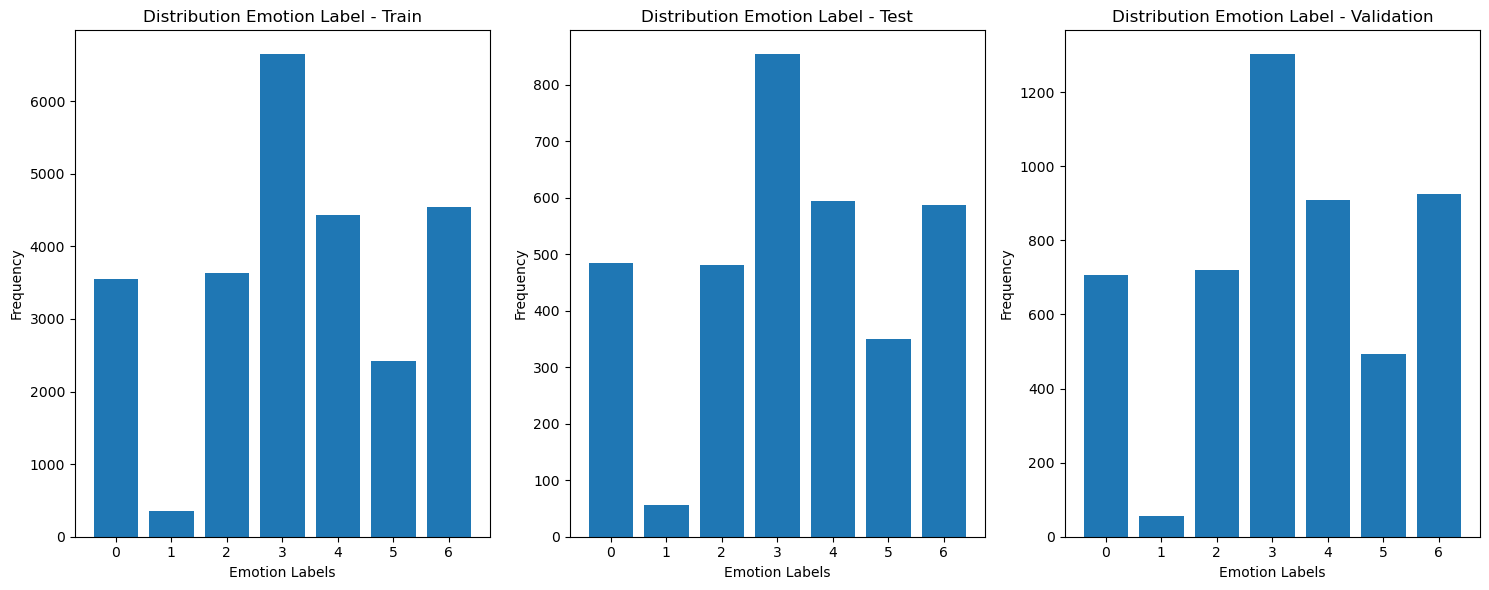

In [ ]:
x_train_norm, x_test_norm, x_val_norm, y_train_norm, y_test_norm, y_val_norm = split_data(image_raws, labels)
print("On the original normalized data set")
print(f"- training set shape: {x_train_norm.shape}")
print(f"- testing set shape: {x_test_norm.shape}")
print(f"- valid set shape: {x_val_norm.shape}")

draw_emotion_distribution(y_train_norm, y_test_norm, y_val_norm)

On the transformed data set
- training set shape: (25570, 158)
- testing set shape: (3410, 158)
- valid set shape: (5114, 158)


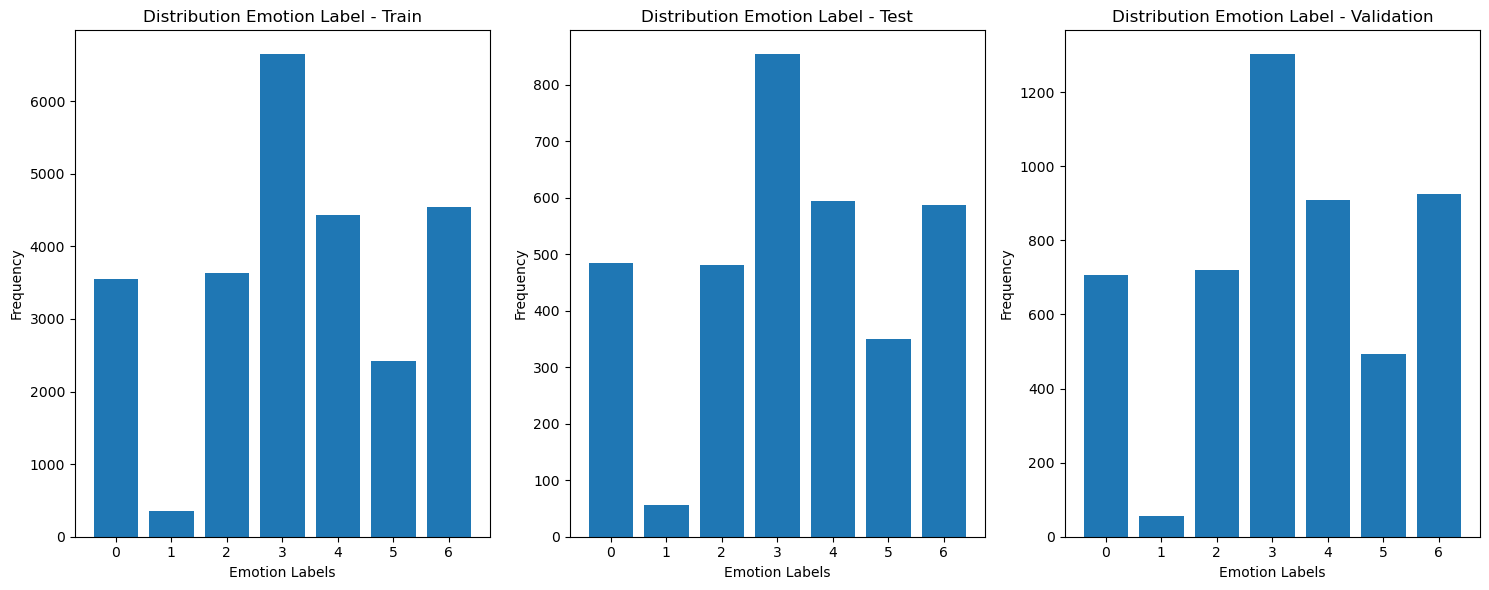

In [ ]:
x_train_pca, x_test_pca, x_val_pca, y_train_pca, y_test_pca, y_val_pca = split_data(images_pca, labels)
print("On the transformed data set")
print(f"- training set shape: {x_train_pca.shape}")
print(f"- testing set shape: {x_test_pca.shape}")
print(f"- valid set shape: {x_val_pca.shape}")

draw_emotion_distribution(y_train_pca, y_test_pca, y_val_pca)

### Resample data

In [15]:
# Using combining of under_sampling and over_sampling methods to handle imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Over sampling
def resample_data(X, y):
    sm = SMOTE(sampling_strategy={
                    1: 4000,
                    5: 4000
                }, random_state=2)
    x_smote, y_smote = sm.fit_resample(X, y)

    # Under sampling
    nr = NearMiss()
    X_resampled, y_resampled = nr.fit_resample(x_smote, y_smote)

    return X_resampled, y_resampled

In [16]:
x_resampled_norm, y_resampled_norm = resample_data(x_train_norm, y_train_norm)
print("On the original normalized data set")
print(f"- original distribution of training set:\n {np.unique(y_train_norm, return_counts=True)}")
print(f"\n- resampled distribution of training set:\n {np.unique(y_resampled_norm, return_counts=True)}")

On the original normalized data set
- original distribution of training set:
 (array([0, 1, 2, 3, 4, 5, 6]), array([3549,  348, 3632, 6644, 4430, 2422, 4545]))

- resampled distribution of training set:
 (array([0, 1, 2, 3, 4, 5, 6]), array([3549, 3549, 3549, 3549, 3549, 3549, 3549]))


In [17]:
x_resampled_pca, y_resampled_pca = resample_data(x_train_pca, y_train_pca)
print("On the transformed data set")
print(f"- original distribution of training set:\n {np.unique(y_train_pca, return_counts=True)}")
print(f"\n- resampled distribution of training set:\n {np.unique(y_resampled_pca, return_counts=True)}")

On the transformed data set
- original distribution of training set:
 (array([0, 1, 2, 3, 4, 5, 6]), array([3549,  348, 3632, 6644, 4430, 2422, 4545]))

- resampled distribution of training set:
 (array([0, 1, 2, 3, 4, 5, 6]), array([3549, 3549, 3549, 3549, 3549, 3549, 3549]))


### Building models

#### Model 1: Random Forest Classifier

##### On original dataset

In [ ]:
x_train_norm.shape

(25570, 2304)

In [ ]:
# Define RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Define the pipeline with a scaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', rfc)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion' :['gini', 'entropy']
}

# Define GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)


In [ ]:
# Fitting
grid_search.fit(x_train_norm, y_train_norm)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time= 1.8min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 3.7min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 3.7min
[CV] END classifier__max_depth=10, classifier__n_estimators=200; total time= 2.3min
[CV] END classifier__max_depth=15, classifier__n_estimators=100; total time= 1.7min
[CV] END classifier__max_depth=15, classifier__n_estimators=200; total time= 3.4min
[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time= 1.9min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 3.7min
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 1.2min
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 1.2min
[CV] END classifier__max_depth=10, classifier__n_estimators=200; total time= 2.3min
[CV] END classifier__max_depth=15, classifier__n_estimators=100; t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 15],
                         'classifier__n_estimators': [100, 200]},
             verbose=2)

[CV] END classifier__max_depth=None, classifier__n_estimators=100; total time= 1.8min
[CV] END classifier__max_depth=None, classifier__n_estimators=200; total time= 3.7min
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 1.2min
[CV] END classifier__max_depth=10, classifier__n_estimators=100; total time= 1.2min
[CV] END classifier__max_depth=10, classifier__n_estimators=200; total time= 2.3min
[CV] END classifier__max_depth=10, classifier__n_estimators=200; total time= 2.4min
[CV] END classifier__max_depth=15, classifier__n_estimators=100; total time= 1.7min
[CV] END classifier__max_depth=15, classifier__n_estimators=200; total time= 3.2min


In [ ]:
# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Predict on the validation set
y_val_pred = grid_search.predict(x_val_norm)

# Evaluate the model
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_norm, y_val_pred))

# Predict on the test set
y_test_pred = grid_search.predict(x_test_norm)

# Evaluate the model
test_accuracy = accuracy_score(y_test_norm, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_norm, y_test_pred))

Best parameters found: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best cross-validation score: 0.42061008994915916
Validation Accuracy: 0.4192412983965585
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.12      0.19       706
           1       1.00      0.04      0.07        56
           2       0.39      0.21      0.28       721
           3       0.42      0.79      0.55      1302
           4       0.35      0.34      0.34       910
           5       0.59      0.43      0.49       494
           6       0.42      0.38      0.40       925

    accuracy                           0.42      5114
   macro avg       0.51      0.33      0.33      5114
weighted avg       0.43      0.42      0.39      5114

Test Accuracy: 0.41642228739002934
Test Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.12      0.19       485
           1       0

In [ ]:
#saving the  model to be used later
import pickle
pickle.dump(grid_search, open(file = "/kaggle/working/md_rfc_norm.sav", mode = "wb"))

##### On transformed dataset

In [ ]:
# Define RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Define the pipeline with a scaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', rfc)
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 15],
#     'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion' :['gini', 'entropy']
}

# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8]
#     'criterion' :['gini', 'entropy', 'log_loss']
# }

# Define GridSearchCV
grid_search_pca = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting
grid_search_pca.fit(x_train_pca, y_train_pca)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 15],
                         'classifier__n_estimators': [100, 200]},
             verbose=2)

[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100; total time=  44.0s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100; total time=  44.3s
[CV] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=200; total time= 1.5min
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__n_estimators=100; total time=  29.1s
[CV] END classifier__criterion=gini, classifier__max_depth=10, classifier__n_estimators=200; total time=  56.9s
[CV] END classifier__criterion=gini, classifier__max_depth=15, classifier__n_estimators=100; total time=  38.3s
[CV] END classifier__criterion=gini, classifier__max_depth=15, classifier__n_estimators=100; total time=  37.7s
[CV] END classifier__criterion=gini, classifier__max_depth=15, classifier__n_estimators=200; total time= 1.3min
[CV] END classifier__criterion=entropy, classifier__max_depth=None, classifier__n_estimators=100; 

In [ ]:
# Print the best parameters and best score
print(f"Best parameters found: {grid_search_pca.best_params_}")
print(f"Best cross-validation score: {grid_search_pca.best_score_}")

# Predict on the validation set
y_val_pred = grid_search_pca.predict(x_val_pca)

# Evaluate the model
val_accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_pca, y_val_pred))

# Predict on the test set
y_test_pred = grid_search_pca.predict(x_test_pca)

# Evaluate the model
test_accuracy = accuracy_score(y_test_pca, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_pca, y_test_pred))

Best parameters found: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best cross-validation score: 0.3674618693781776
Validation Accuracy: 0.3597966366836136
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.08      0.14       706
           1       1.00      0.02      0.04        56
           2       0.42      0.16      0.23       721
           3       0.34      0.84      0.48      1302
           4       0.33      0.23      0.27       910
           5       0.66      0.26      0.38       494
           6       0.38      0.25      0.30       925

    accuracy                           0.36      5114
   macro avg       0.51      0.26      0.26      5114
weighted avg       0.41      0.36      0.31      5114

Test Accuracy: 0.35953079178885633
Test Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.07      0.1

In [ ]:
#saving the  model to be used later
import pickle
pickle.dump(grid_search_pca, open(file = "/kaggle/working/md_rfc_pca.sav", mode = "wb"))

#### Model 2. KNN

##### On Original dataset

In [ ]:
# Define knn
from sklearn.neighbors import KNeighborsClassifier

# Define the pipeline with a scaler and kmeans
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [0,2, 4, 6],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [ ]:
# Fitting
grid_search.fit(x_train_norm, y_train_norm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [0, 2, 4, 6],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Predict on the validation set
y_val_pred = grid_search.predict(x_val_norm)

# Evaluate the model
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_norm, y_val_pred))

# Predict on the test set
y_test_pred = grid_search.predict(x_test_norm)

# Evaluate the model
test_accuracy = accuracy_score(y_test_norm, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_norm, y_test_pred))

Best parameters found: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 10000, 'classifier__weights': 'uniform'}
Best cross-validation score: 0.2598357450136879
Validation Accuracy: 0.2545952287837309
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       706
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       721
           3       0.25      1.00      0.41      1302
           4       0.00      0.00      0.00       910
           5       0.00      0.00      0.00       494
           6       0.00      0.00      0.00       925

    accuracy                           0.25      5114
   macro avg       0.04      0.14      0.06      5114
weighted avg       0.06      0.25      0.10      5114



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.2504398826979472
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       485
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       482
           3       0.25      1.00      0.40       854
           4       0.00      0.00      0.00       594
           5       0.00      0.00      0.00       351
           6       0.00      0.00      0.00       587

    accuracy                           0.25      3410
   macro avg       0.04      0.14      0.06      3410
weighted avg       0.06      0.25      0.10      3410



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### On Transformed dataset

In [ ]:
# Define knn
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', KNeighborsClassifier(metric='euclidean', weights='uniform'))
])

# Define the parameter grid
param_grid = {
   'classifier__n_neighbors': [1,2,3, 4,5]
}


# Define GridSearchCV
grid_search_pca = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting
grid_search_pca.fit(x_train_pca, y_train_pca)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        KNeighborsClassifier(metric='euclidean'))]),
             n_jobs=-1, param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5]},
             verbose=2)

In [ ]:
# Print the best parameters and best score
print(f"Best parameters found: {grid_search_pca.best_params_}")
print(f"Best cross-validation score: {grid_search_pca.best_score_}")

# Predict on the validation set
y_val_pred = grid_search_pca.predict(x_val_pca)

# Evaluate the model
val_accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_pca, y_val_pred))

# Predict on the test set
y_test_pred = grid_search_pca.predict(x_test_pca)

# Evaluate the model
test_accuracy = accuracy_score(y_test_pca, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_pca, y_test_pred))

Best parameters found: {'classifier__n_neighbors': 4}
Best cross-validation score: 0.16112631990614
Validation Accuracy: 0.18087602659366445
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       706
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       721
           3       0.00      0.00      0.00      1302
           4       0.00      0.00      0.00       910
           5       0.00      0.00      0.00       494
           6       0.18      1.00      0.31       925

    accuracy                           0.18      5114
   macro avg       0.03      0.14      0.04      5114
weighted avg       0.03      0.18      0.06      5114



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.17214076246334312
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       485
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       482
           3       0.00      0.00      0.00       854
           4       0.00      0.00      0.00       594
           5       0.00      0.00      0.00       351
           6       0.17      1.00      0.29       587

    accuracy                           0.17      3410
   macro avg       0.02      0.14      0.04      3410
weighted avg       0.03      0.17      0.05      3410



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Best parameters found: {grid_search_pca.best_params_}")
print(f"Best cross-validation score: {grid_search_pca.best_score_}")

# Predict on the validation set
y_val_pred = grid_search_pca.predict(x_val_norm)

# Evaluate the model
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_norm, y_val_pred))

# Predict on the test set
y_test_pred = grid_search_pca.predict(x_test_norm)

# Evaluate the model
test_accuracy = accuracy_score(y_test_norm, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_norm, y_test_pred))

Best parameters found: {'classifier__metric': 'minkowski', 'classifier__n_neighbors': 10000, 'classifier__weights': 'uniform'}
Best cross-validation score: 0.2598357450136879
Validation Accuracy: 0.2545952287837309
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       706
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       721
           3       0.25      1.00      0.41      1302
           4       0.00      0.00      0.00       910
           5       0.00      0.00      0.00       494
           6       0.00      0.00      0.00       925

    accuracy                           0.25      5114
   macro avg       0.04      0.14      0.06      5114
weighted avg       0.06      0.25      0.10      5114



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END classifier__metric=minkowski, classifier__n_neighbors=10000, classifier__weights=uniform; total time= 7.6min
[CV] END classifier__metric=minkowski, classifier__n_neighbors=10000, classifier__weights=uniform; total time= 7.6min
Test Accuracy: 0.2504398826979472
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       485
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       482
           3       0.25      1.00      0.40       854
           4       0.00      0.00      0.00       594
           5       0.00      0.00      0.00       351
           6       0.00      0.00      0.00       587

    accuracy                           0.25      3410
   macro avg       0.04      0.14      0.06      3410
weighted avg       0.06      0.25      0.10      3410



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model 3: SVM - SVC

In [ ]:
from sklearn.svm import SVC

##### On original dataset

In [ ]:
# Define the pipeline with a scaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', SVC())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [100],
    'classifier__gamma': ['scale'],
    'classifier__kernel': ['sigmoid']
}


# Define GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, verbose=2)


In [ ]:
# Fitting
grid_search.fit(x_train_norm, y_train_norm)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time=35.1min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time=35.2min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time=35.2min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time=35.1min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time=20.0min


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             n_jobs=-1,
             param_grid={'classifier__C': [100], 'classifier__gamma': ['scale'],
                         'classifier__kernel': ['sigmoid']},
             verbose=2)

In [ ]:
# Print the best parameters and best score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Predict on the validation set
y_val_pred = grid_search.predict(x_val_norm)

# Evaluate the model
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_norm, y_val_pred))

# Predict on the test set
y_test_pred = grid_search.predict(x_test_norm)

# Evaluate the model
test_accuracy = accuracy_score(y_test_norm, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_norm, y_test_pred))

Best parameters found: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid'}
Best cross-validation score: 0.2598357450136879
Validation Accuracy: 0.2545952287837309
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       706
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       721
           3       0.25      1.00      0.41      1302
           4       0.00      0.00      0.00       910
           5       0.00      0.00      0.00       494
           6       0.00      0.00      0.00       925

    accuracy                           0.25      5114
   macro avg       0.04      0.14      0.06      5114
weighted avg       0.06      0.25      0.10      5114



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.2504398826979472
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       485
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       482
           3       0.25      1.00      0.40       854
           4       0.00      0.00      0.00       594
           5       0.00      0.00      0.00       351
           6       0.00      0.00      0.00       587

    accuracy                           0.25      3410
   macro avg       0.04      0.14      0.06      3410
weighted avg       0.06      0.25      0.10      3410



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#saving the  model to be used later
import pickle
pickle.dump(grid_search, open(file = "/kaggle/working/md_svc_norm.sav", mode = "wb"))

##### On transformed dataset

In [ ]:
# Define the pipeline with a scaler and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', SVC())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [100],
    'classifier__gamma': ['scale'],
    'classifier__kernel': ['sigmoid']
}


# Define GridSearchCV
grid_search_pca = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, verbose=2)


In [ ]:
# Fitting
grid_search_pca.fit(x_train_pca, y_train_pca)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time= 1.6min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time= 1.6min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time= 1.6min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time= 1.7min
[CV] END classifier__C=100, classifier__gamma=scale, classifier__kernel=sigmoid; total time= 1.8min


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [100], 'classifier__gamma': ['scale'],
                         'classifier__kernel': ['sigmoid']},
             verbose=2)

In [ ]:
#saving the  model to be used later
import pickle
pickle.dump(grid_search_pca, open(file = "/kaggle/working/md_svc_pca2.sav", mode = "wb"))

In [ ]:
print(f"Best parameters found: {grid_search_pca.best_params_}")
print(f"Best cross-validation score: {grid_search_pca.best_score_}")

# Predict on the validation set
y_val_pred = grid_search_pca.predict(x_val_pca)

# Evaluate the model
val_accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_pca, y_val_pred))

# Predict on the test set
y_test_pred = grid_search_pca.predict(x_test_pca)

# Evaluate the model
test_accuracy = accuracy_score(y_test_pca, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_pca, y_test_pred))

Best parameters found: {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'sigmoid'}
Best cross-validation score: 0.2598357450136879
Validation Accuracy: 0.2545952287837309
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       706
           1       0.00      0.00      0.00        56
           2       0.00      0.00      0.00       721
           3       0.25      1.00      0.41      1302
           4       0.00      0.00      0.00       910
           5       0.00      0.00      0.00       494
           6       0.00      0.00      0.00       925

    accuracy                           0.25      5114
   macro avg       0.04      0.14      0.06      5114
weighted avg       0.06      0.25      0.10      5114



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.2504398826979472
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       485
           1       0.00      0.00      0.00        57
           2       0.00      0.00      0.00       482
           3       0.25      1.00      0.40       854
           4       0.00      0.00      0.00       594
           5       0.00      0.00      0.00       351
           6       0.00      0.00      0.00       587

    accuracy                           0.25      3410
   macro avg       0.04      0.14      0.06      3410
weighted avg       0.06      0.25      0.10      3410



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model 4: MLP Classifier

In [20]:
from sklearn.neural_network import MLPClassifier

Due to the large data and the complexity of the MLP model, running the GridSearchCV() to find the best combination of hyperparameters probably takes lots of time and effort. Therefore, we decided to manually tune some key hyperparameters that have a large impact on the performance of the MLP model.

##### Tunning mannually (learning_rate, batch_size, hidden_layer)

**Varying learning rates**

First we will evaluate the training behavior for a "full dataset batch" (i.e., gradient descent training), while the "learning rate" is varied between the values 0.5, 1 and 10.

MLPClassifier uses mini-batches by default. We will set the value equal the total number of samples in the training set, so that the whole training set is used on each epoch. We will test other approaches later. Also, we will set "shuffle = True" so that at each epoch the data is given for training in a new random order.

In [ ]:
mlp_eta_01 = MLPClassifier(solver="sgd")
mlp_eta_01.hidden_layer_sizes = (25,)
mlp_eta_01.activation = "logistic"
mlp_eta_01.learning_rate_init = 0.1
mlp_eta_01.alpha = 0.0001
mlp_eta_01.batch_size = X_train_reshape.shape[0]
mlp_eta_01.shuffle = True
mlp_eta_01.random_state = 101
mlp_eta_01.momentum = 0
mlp_eta_01.verbose = False
mlp_eta_01.max_iter = 10000

mlp_eta_01.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=25120, hidden_layer_sizes=(25,),
              learning_rate_init=0.1, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

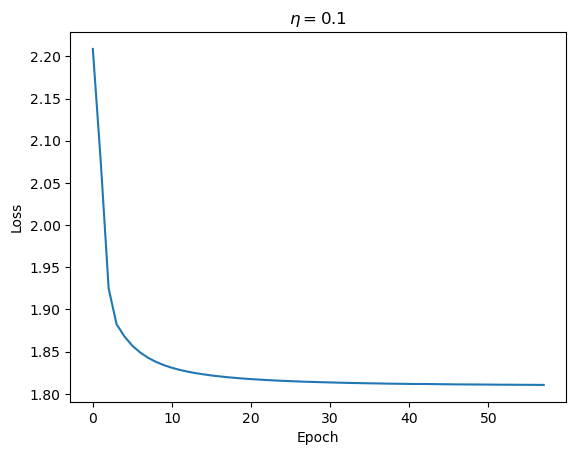

Loss: 		 1.8105620030697347

Iterations: 	 58


In [ ]:
fig_mlp_eta_01 = plt.figure()
ax1 = fig_mlp_eta_01.add_subplot(111)
ax1.plot(mlp_eta_01.loss_curve_)
ax1.set(title=r"$\eta = 0.1$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_eta_01.loss_)
print('Iterations: \t', mlp_eta_01.n_iter_)

In [ ]:
mlp_eta_05 = MLPClassifier(solver="sgd")
mlp_eta_05.hidden_layer_sizes = (25,)
mlp_eta_05.activation = "logistic"
mlp_eta_05.learning_rate_init = 0.5
mlp_eta_05.alpha = 0.0001
mlp_eta_05.batch_size = X_train_reshape.shape[0]
mlp_eta_05.shuffle = True
mlp_eta_05.random_state = 101
mlp_eta_05.momentum = 0
mlp_eta_05.verbose = False
mlp_eta_05.max_iter = 10000

mlp_eta_05.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=25120, hidden_layer_sizes=(25,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

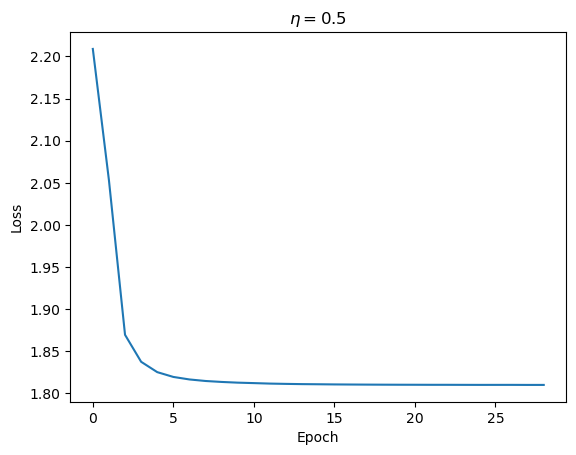

Loss: 		 1.8101264396580048

Iterations: 	 29


In [ ]:
fig_mlp_eta_05 = plt.figure()
ax1 = fig_mlp_eta_05.add_subplot(111)
ax1.plot(mlp_eta_05.loss_curve_)
ax1.set(title=r"$\eta = 0.5$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_eta_05.loss_)
print('Iterations: \t', mlp_eta_05.n_iter_)

The results above show that increasing the learning rate from 0.1 to 0.5 slightly speed up convergence (from 58 to 29 iterations) and return a lower final loss on the training set (from 1.8106 to 1.8101).

In [ ]:
mlp_eta_2 = MLPClassifier(solver="sgd")
mlp_eta_2.hidden_layer_sizes = (25,)
mlp_eta_2.activation = "logistic"
mlp_eta_2.learning_rate_init = 2
mlp_eta_2.alpha = 0.0001
mlp_eta_2.batch_size = X_train_reshape.shape[0]
mlp_eta_2.shuffle = True
mlp_eta_2.random_state = 101
mlp_eta_2.momentum = 0
mlp_eta_2.verbose = False
mlp_eta_2.max_iter = 10000

mlp_eta_2.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=25120, hidden_layer_sizes=(25,),
              learning_rate_init=2, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

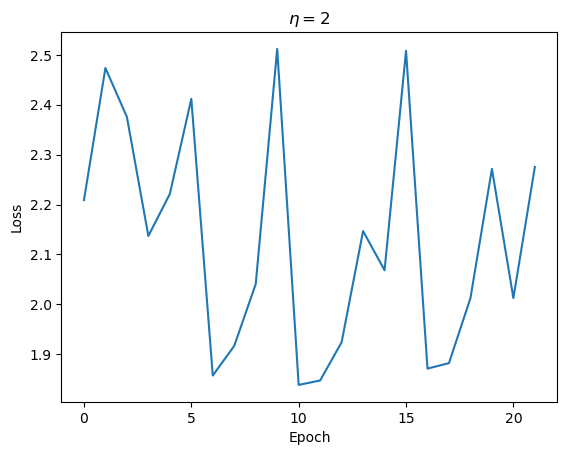

Loss: 		 2.275447272965939

Iterations: 	 22


In [ ]:
fig_mlp_eta_2 = plt.figure()
ax1 = fig_mlp_eta_2.add_subplot(111)
ax1.plot(mlp_eta_2.loss_curve_)
ax1.set(title=r"$\eta = 2$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_eta_2.loss_)
print('Iterations: \t', mlp_eta_2.n_iter_)

However, once we increase the learning rate to 2, the training doesn't even reach convergence. This was expected, since a large learning rate makes the walk over the "Loss surface" unstable, as it doesn't allow the training algorithm to settle on a minimum.

**Different batch sizes**

*SGD training (batch size = 1)*

In [ ]:
mlp_SGD = MLPClassifier(solver="sgd")
mlp_SGD.hidden_layer_sizes = (25,)
mlp_SGD.activation = "logistic"
mlp_SGD.learning_rate_init = 0.5
mlp_SGD.alpha = 0.0001
mlp_SGD.batch_size = 1
mlp_SGD.shuffle = True
mlp_SGD.random_state = 101
mlp_SGD.momentum = 0
mlp_SGD.verbose = False
mlp_SGD.max_iter = 10000

mlp_SGD.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=1, hidden_layer_sizes=(25,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

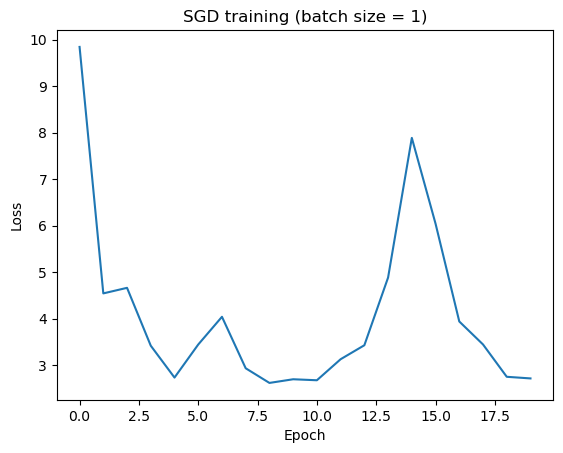

Loss: 		 2.718518796493792

Iterations: 	 20


In [ ]:
fig_mlp_SGD = plt.figure()
ax1 = fig_mlp_SGD.add_subplot(111)
ax1.plot(mlp_SGD.loss_curve_)
ax1.set(title=r"SGD training (batch size = 1)", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_SGD.loss_)
print('Iterations: \t', mlp_SGD.n_iter_)

As can be seen on the results above, stochastic gradient descent shows unstable behavior and doesn't converge as it is. We can try to reduce the learning rate and increase the regularization coefficient in hopes of smoothing the training steps (the "search" over the loss surface).

In [ ]:
mlp_SGD2 = MLPClassifier(solver="sgd")
mlp_SGD2.hidden_layer_sizes = (25,)
mlp_SGD2.activation = "logistic"
mlp_SGD2.learning_rate_init = 0.01
mlp_SGD2.alpha = 0.1
mlp_SGD2.batch_size = 1
mlp_SGD2.shuffle = True
mlp_SGD2.random_state = 101
mlp_SGD2.momentum = 0
mlp_SGD2.verbose = False
mlp_SGD2.max_iter = 10000

mlp_SGD2.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', alpha=0.1, batch_size=1,
              hidden_layer_sizes=(25,), learning_rate_init=0.01, max_iter=10000,
              momentum=0, random_state=101, solver='sgd')

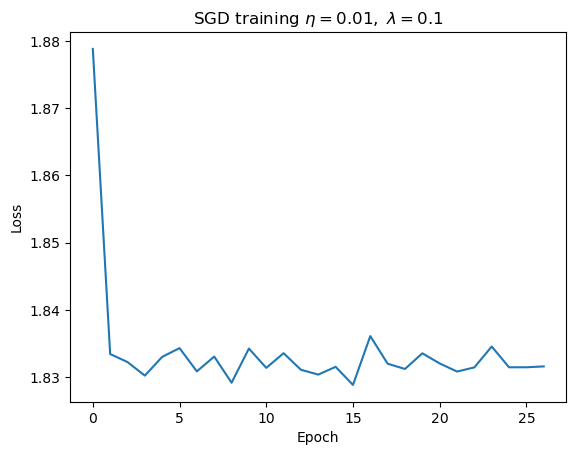

Loss: 		 1.8315898844125635

Iterations: 	 27


In [ ]:
fig_mlp_SGD2 = plt.figure()
ax1 = fig_mlp_SGD2.add_subplot(111)
ax1.plot(mlp_SGD2.loss_curve_)
ax1.set(title=r"SGD training $\eta = 0.01, \ \lambda = 0.1$", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_SGD2.loss_)
print('Iterations: \t', mlp_SGD2.n_iter_)

The changes weren't enough to make the training work.

*Mini-Batch Approach*

We can now try to use the mini-batch approach.

In [ ]:
mlp_MB1000000 = MLPClassifier(solver="sgd")
mlp_MB1000000.hidden_layer_sizes = (25,)
mlp_MB1000000.activation = "logistic"
mlp_MB1000000.learning_rate_init = 0.5
mlp_MB1000000.alpha = 0.0001
mlp_MB1000000.batch_size = 5000
mlp_MB1000000.shuffle = True
mlp_MB1000000.random_state = 101
mlp_MB1000000.momentum = 0
mlp_MB1000000.verbose = False
mlp_MB1000000.max_iter = 10000

mlp_MB1000000.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=5000, hidden_layer_sizes=(25,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

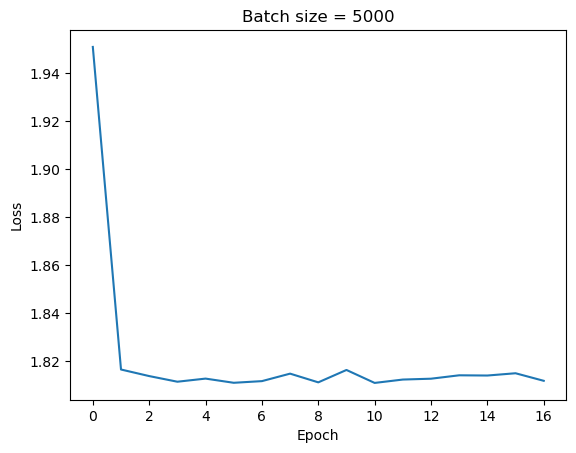

Loss: 		 1.8119378315003143

Iterations: 	 17


In [ ]:
fig_mlp_MB1000000 = plt.figure()
ax1 = fig_mlp_MB1000000.add_subplot(111)
ax1.plot(mlp_MB1000000.loss_curve_)
ax1.set(title=r"Batch size = 5000", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_MB1000000.loss_)
print('Iterations: \t', mlp_MB1000000.n_iter_)

In [ ]:
mlp_MB10000 = MLPClassifier(solver="sgd")
mlp_MB10000.hidden_layer_sizes = (25,)
mlp_MB10000.activation = "logistic"
mlp_MB10000.learning_rate_init = 0.5
mlp_MB10000.alpha = 0.0001
mlp_MB10000.batch_size = 10000
mlp_MB10000.shuffle = True
mlp_MB10000.random_state = 101
mlp_MB10000.momentum = 0
mlp_MB10000.verbose = False
mlp_MB10000.max_iter = 10000

mlp_MB10000.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=10000, hidden_layer_sizes=(25,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

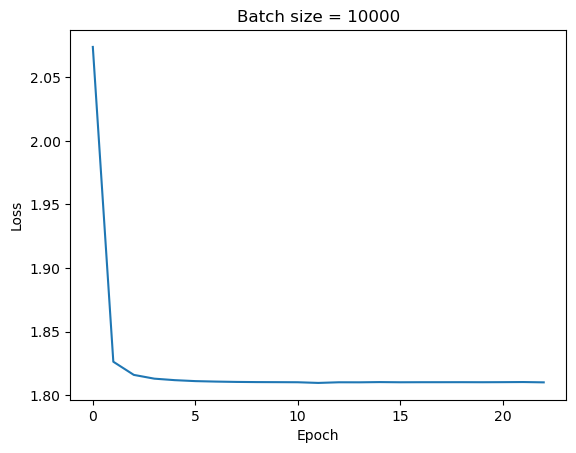

Loss: 		 1.8101080657131001

Iterations: 	 23


In [ ]:
fig_mlp_MB10000 = plt.figure()
ax1 = fig_mlp_MB10000.add_subplot(111)
ax1.plot(mlp_MB10000.loss_curve_)
ax1.set(title=r"Batch size = 10000", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_MB10000.loss_)
print('Iterations: \t', mlp_MB10000.n_iter_)

In [ ]:
mlp_MB20 = MLPClassifier(solver="sgd")
mlp_MB20.hidden_layer_sizes = (25,)
mlp_MB20.activation = "logistic"
mlp_MB20.learning_rate_init = 0.5
mlp_MB20.alpha = 0.0001
mlp_MB20.batch_size = 20000
mlp_MB20.shuffle = True
mlp_MB20.random_state = 101
mlp_MB20.momentum = 0
mlp_MB20.verbose = False
mlp_MB20.max_iter = 10000

mlp_MB20.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=20000, hidden_layer_sizes=(25,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

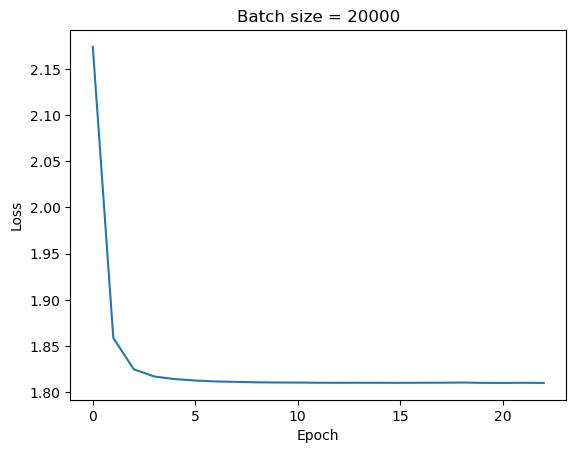

Loss: 		 1.810124307637218

Iterations: 	 23


In [ ]:
fig_mlp_MB20 = plt.figure()
ax1 = fig_mlp_MB20.add_subplot(111)
ax1.plot(mlp_MB20.loss_curve_)
ax1.set(title=r"Batch size = 20000", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_MB20.loss_)
print('Iterations: \t', mlp_MB20.n_iter_)

**Hidden Layer**

Another hyper-parameter that can be adjusted is the number of hidden layers and the number of units in each hidden layer.

A MLP with a single hidden layer is a "universal approximator", meaning that it can approximate any continuous function given a sufficient number of units in the hidden layer.

However, as the number of hidden units is increased, so is the network's complexity and its tendency to overfit the data. Thus, a larger hidden layer doesn't always translate into a better model, especially when the capacity for generalization is at stake.

The next experiments will evaluate the influence of the size of the hidden layer on the network's capacity to be trained on the dataset, comparing the number of iterations necessary for convergence and the final loss achieved to the previous cases.

In [ ]:
mlp_Hid50 = MLPClassifier(solver="sgd")
mlp_Hid50.hidden_layer_sizes = (50,)
mlp_Hid50.activation = "logistic"
mlp_Hid50.learning_rate_init = 0.5
mlp_Hid50.alpha = 0.0001
mlp_Hid50.batch_size = 4000
mlp_Hid50.shuffle = True
mlp_Hid50.random_state = 101
mlp_Hid50.momentum = 0
mlp_Hid50.verbose = False
mlp_Hid50.max_iter = 10000

mlp_Hid50.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=4000, hidden_layer_sizes=(50,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

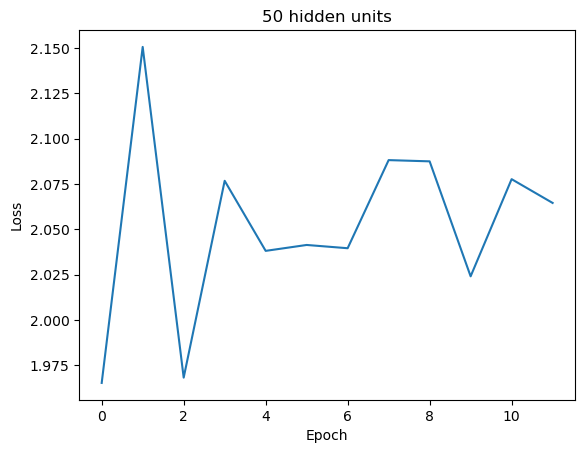

Loss: 		 2.064576566480438

Iterations: 	 12


In [ ]:
fig_mlp_Hid50 = plt.figure()
ax1 = fig_mlp_Hid50.add_subplot(111)
ax1.plot(mlp_Hid50.loss_curve_)
ax1.set(title=r"50 hidden units", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_Hid50.loss_)
print('Iterations: \t', mlp_Hid50.n_iter_)

In [ ]:
mlp_Hid10 = MLPClassifier(solver="sgd")
mlp_Hid10.hidden_layer_sizes = (10,)
mlp_Hid10.activation = "logistic"
mlp_Hid10.learning_rate_init = 0.5
mlp_Hid10.alpha = 0.0001
mlp_Hid10.batch_size = 4000
mlp_Hid10.shuffle = True
mlp_Hid10.random_state = 101
mlp_Hid10.momentum = 0
mlp_Hid10.verbose = False
mlp_Hid10.max_iter = 10000

mlp_Hid10.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=4000, hidden_layer_sizes=(10,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

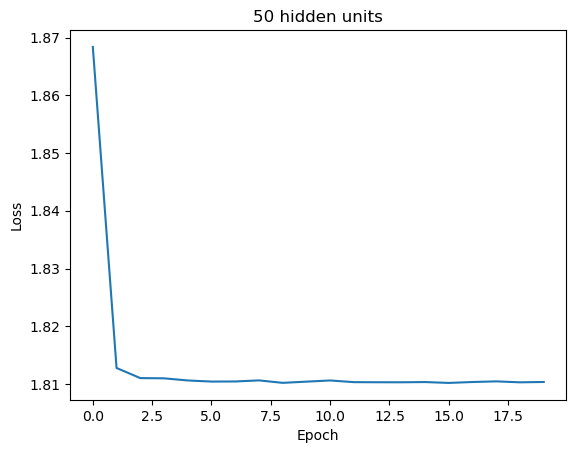

Loss: 		 1.8103575301206176

Iterations: 	 20


In [ ]:
fig_mlp_Hid10 = plt.figure()
ax1 = fig_mlp_Hid10.add_subplot(111)
ax1.plot(mlp_Hid10.loss_curve_)
ax1.set(title=r"50 hidden units", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_Hid10.loss_)
print('Iterations: \t', mlp_Hid10.n_iter_)

In [ ]:
mlp_Hid1 = MLPClassifier(solver="sgd")
mlp_Hid1.hidden_layer_sizes = (1,)
mlp_Hid1.activation = "logistic"
mlp_Hid1.learning_rate_init = 0.5
mlp_Hid1.alpha = 0.0001
mlp_Hid1.batch_size = 4000
mlp_Hid1.shuffle = True
mlp_Hid1.random_state = 101
mlp_Hid1.momentum = 0
mlp_Hid1.verbose = False
mlp_Hid1.max_iter = 10000

mlp_Hid1.fit(X_train_reshape, y_train)

MLPClassifier(activation='logistic', batch_size=4000, hidden_layer_sizes=(1,),
              learning_rate_init=0.5, max_iter=10000, momentum=0,
              random_state=101, solver='sgd')

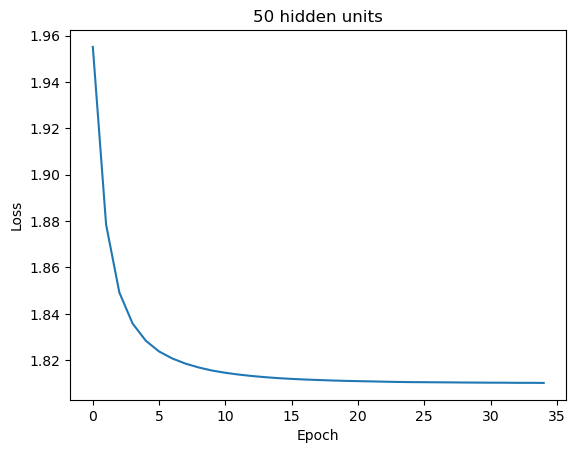

Loss: 		 1.8102080101825784

Iterations: 	 35


In [ ]:
fig_mlp_Hid1 = plt.figure()
ax1 = fig_mlp_Hid1.add_subplot(111)
ax1.plot(mlp_Hid1.loss_curve_)
ax1.set(title=r"50 hidden units", xlabel="Epoch", ylabel="Loss")

plt.show()

print('Loss: \t\t', mlp_Hid1.loss_)
print('Iterations: \t', mlp_Hid1.n_iter_)

The results above show that decreasing the hidden layer slightly speed up convergence and return a lower final loss on the training set.

However, when you compare the results above to the first case studied, where we had the same setup except for the number of units in the hidden layer, the improvement in convergence and loss isn't significant.

What we can do is now make adjustments to other hyper-parameters and, at last, evaluate the model's performance on the "test dataset", which will tell us wether the training is overfitting or not and if our model is capable of generalization.

##### Cross Validation

- On original dataset

Up until now, we have modified one hyper-parameter at a time while keeping all others at a defined value. We can try now to combine these adjustments in a way that, hopefully, improves our classifier even more.

In [29]:
# Define MLPClassifier
mlpc = MLPClassifier(solver="sgd",
                    batch_size = 10000,
                    learning_rate_init = 0.5,
                    activation = 'logistic',
                    learning_rate = 'adaptive',
                    max_iter = 10000,
                    random_state = 101)

# Define the pipeline with a scaler and MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', mlpc)
])

# Select parameters to perform fine-tuning
param_grid = {"classifier__alpha": [0.1, 0.01, 0.001, 0.0001],
              "classifier__hidden_layer_sizes": [(2,), (10,), (20,)]}


# Define GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring="accuracy", verbose=0, n_jobs=-1)

In [30]:
# Fitting
grid_search.fit(x_resampled_norm, y_resampled_norm)

#saving the  model to be used later
import pickle
pickle.dump(grid_search, open(file = "/kaggle/working/md_mlpc_norm.sav", mode = "wb"))

In [31]:
md_mlpc_norm = pickle.load(open("/kaggle/input/grid-search-mlp/md_mlpc_norm.sav", 'rb'))

In [32]:
# Print the best parameters and best score
print(f"Best parameters found: {md_mlpc_norm.best_params_}")
print(f"Best cross-validation score: {md_mlpc_norm.best_score_}")

# Predict on the validation set
y_val_pred = md_mlpc_norm.predict(x_val_norm)

# Evaluate the model
val_accuracy = accuracy_score(y_val_norm, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_norm, y_val_pred))


# Predict on the test set
y_test_pred = md_mlpc_norm.predict(x_test_norm)

# Evaluate the model
test_accuracy = accuracy_score(y_test_norm, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_norm, y_test_pred))

Best parameters found: {'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (10,)}
Best cross-validation score: 0.35152759328583505
Validation Accuracy: 0.3015252248728979
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.21      0.20       706
           1       0.03      0.11      0.04        56
           2       0.19      0.16      0.17       721
           3       0.49      0.43      0.46      1302
           4       0.29      0.20      0.24       910
           5       0.29      0.49      0.37       494
           6       0.30      0.32      0.31       925

    accuracy                           0.30      5114
   macro avg       0.26      0.27      0.26      5114
weighted avg       0.31      0.30      0.30      5114

Test Accuracy: 0.3187683284457478
Test Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       485
           1     

- On transformed dataset

In [33]:
# Define MLPClassifier
mlpc = MLPClassifier(solver="sgd",
                    batch_size = 10000,
                    learning_rate_init = 0.5,
                    activation = 'logistic',
                    learning_rate = 'adaptive',
                    max_iter = 10000,
                    random_state = 101)

# Define the pipeline with a scaler and MLPClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing step
    ('classifier', mlpc)
])

# Select parameters to perform fine-tuning
param_grid = {"classifier__alpha": [0.1, 0.01, 0.001, 0.0001],
              "classifier__hidden_layer_sizes": [(2,), (10,), (20,)]}


# Define GridSearchCV
grid_search_pca = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring="accuracy", verbose=0, n_jobs=-1)

In [34]:
# Fitting
grid_search_pca.fit(x_resampled_pca, y_resampled_pca)

#saving the  model to be used later
pickle.dump(grid_search_pca, open(file = "/kaggle/working/md_mlpc_pca.sav", mode = "wb"))

In [35]:
md_mlpc_pca = pickle.load(open("/kaggle/input/grid-search-mlp/md_mlpc_pca.sav", 'rb'))

In [36]:
# Print the best parameters and best score
print(f"Best parameters found: {md_mlpc_pca.best_params_}")
print(f"Best cross-validation score: {md_mlpc_pca.best_score_}")

# Predict on the validation set
y_val_pred = md_mlpc_pca.predict(x_val_pca)

# Evaluate the model
val_accuracy = accuracy_score(y_val_pca, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print("Validation Classification Report:")
print(classification_report(y_val_pca, y_val_pred))


# Predict on the test set
y_test_pred = md_mlpc_pca.predict(x_test_pca)

# Evaluate the model
test_accuracy = accuracy_score(y_test_pca, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(classification_report(y_test_pca, y_test_pred))

Best parameters found: {'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (10,)}
Best cross-validation score: 0.3402568127842853
Validation Accuracy: 0.29096597575283534
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.26      0.24       706
           1       0.05      0.21      0.08        56
           2       0.18      0.16      0.17       721
           3       0.47      0.41      0.44      1302
           4       0.28      0.18      0.22       910
           5       0.27      0.49      0.35       494
           6       0.30      0.26      0.27       925

    accuracy                           0.29      5114
   macro avg       0.25      0.28      0.25      5114
weighted avg       0.31      0.29      0.29      5114

Test Accuracy: 0.3035190615835777
Test Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.28      0.26       485
           1      

## **4. Evaluating Classification Performance**

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## visualize the confusion matrices and classification reports here
def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    precision = precision_score(y_true , y_pred, average='micro')
    recall = recall_score(y_true , y_pred, average='macro')
    accuracy = accuracy_score(y_true , y_pred)
    f1 = f1_score(y_true , y_pred, average='macro')

    return precision, recall, accuracy, f1

- On original dataset

In [ ]:
md_rfc_norm = pickle.load(open("/kaggle/input/models/md_rfc_norm.sav", 'rb'))
md_knn_norm = pickle.load(open("/kaggle/input/models/md_knn_norm10000.sav", 'rb'))
md_svm_norm = pickle.load(open("/kaggle/input/models/md_svc_norm.sav", 'rb'))
md_mlpc_norm = pickle.load(open("/kaggle/input/grid-search-mlp/md_mlpc_norm.sav", 'rb'))

In [ ]:
y_val_pred = md_mlpc_norm.predict(x_test_norm)
mlp_precision, mlp_recall, mlp_accuracy, mlp_f1 = calculate_performance(y_test_norm, y_val_pred)

y_val_pred = md_rfc_norm.predict(x_test_norm)
rfc_precision, rfc_recall, rfc_accuracy, rfc_f1 = calculate_performance(y_test_norm, y_val_pred)

y_val_pred = md_knn_norm.predict(x_test_norm)
knn_precision, knn_recall, knn_accuracy, knn_f1 = calculate_performance(y_test_norm, y_val_pred)

y_val_pred = md_svm_norm.predict(x_test_norm)
svm_precision, svm_recall, svm_accuracy, svm_f1 = calculate_performance(y_test_norm, y_val_pred)

- On PCA dataset

In [ ]:
md_rfc_pca = pickle.load(open("/kaggle/input/models/md_rfc_pca.sav", 'rb'))
md_knn_pca = pickle.load(open("/kaggle/input/models/md_knn_pca.sav", 'rb'))
md_svm_pca = pickle.load(open("/kaggle/input/models/md_svc_pca.sav", 'rb'))
md_mlpc_pca = pickle.load(open("/kaggle/input/grid-search-mlp/md_mlpc_pca.sav", 'rb'))

In [ ]:
y_val_pred = md_mlpc_pca.predict(x_test_pca)
mlp_precision, mlp_recall, mlp_accuracy, mlp_f1 = calculate_performance(y_test_pca, y_val_pred)

y_val_pred = md_rfc_pca.predict(x_test_pca)
rfc_precision, rfc_recall, rfc_accuracy, rfc_f1 = calculate_performance(y_test_pca, y_val_pred)

y_val_pred = md_knn_pca.predict(x_test_pca)
knn_precision, knn_recall, knn_accuracy, knn_f1 = calculate_performance(y_test_pca, y_val_pred)

y_val_pred = md_svm_pca.predict(x_test_pca)
svm_precision, svm_recall, svm_accuracy, svm_f1 = calculate_performance(y_test_pca, y_val_pred)

### **Compare the performance of the different classification models**

In [ ]:
df_result = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1-score'])

#df_extended = pd.DataFrame([[mlp_precision, mlp_recall, mlp_accuracy, mlp_f1]], columns = df_result.columns)
df_result = pd.concat([df_result, pd.DataFrame([
        [rfc_precision, rfc_recall, rfc_accuracy, rfc_f1],
        [knn_precision, knn_recall, knn_accuracy, knn_f1],
        [svm_precision, svm_recall, svm_accuracy, svm_f1],
        [mlp_precision, mlp_recall, mlp_accuracy, mlp_f1]
], columns = df_result.columns)])

df_result = df_result.set_axis(['Random Forest Classifier', 'K-nearest Neighbors Classifier', 'Support Vector Classifier', 'Multi-layer Perceptron Classifier'])

/tmp/ipykernel_34/689778786.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result = pd.concat([df_result, pd.DataFrame([


In [ ]:
df_result_pca = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1-score'])

#df_extended = pd.DataFrame([[mlp_precision, mlp_recall, mlp_accuracy, mlp_f1]], columns = df_result.columns)
df_result_pca = pd.concat([df_result_pca, pd.DataFrame([
        [rfc_precision, rfc_recall, rfc_accuracy, rfc_f1],
        [knn_precision, knn_recall, knn_accuracy, knn_f1],
        [svm_precision, svm_recall, svm_accuracy, svm_f1],
        [mlp_precision, mlp_recall, mlp_accuracy, mlp_f1]
], columns = df_result_pca.columns)])

df_result_pca = df_result_pca.set_axis(['Random Forest Classifier', 'K-nearest Neighbors Classifier', 'Support Vector Classifier', 'Multi-layer Perceptron Classifier'])

/tmp/ipykernel_34/1677320002.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_result_pca = pd.concat([df_result_pca, pd.DataFrame([


Based on the evaluation metrics of accuracy, precision, recall, and F1-score in the table above, the Random Forest Classifier appears to have performed the best out of the four models, with the highest score in each metric category.

In [ ]:
df_result

,Accuracy,Precision,Recall,F1-score
Random Forest Classifier,0.416422,0.327991,0.416422,0.325281
K-nearest Neighbors Classifier,0.250440,0.142857,0.250440,0.057223
Support Vector Classifier,0.250440,0.142857,0.250440,0.057223
Multi-layer Perceptron Classifier,0.318768,0.292653,0.318768,0.275711


In [ ]:
df_result_pca

,Accuracy,Precision,Recall,F1-score
Random Forest Classifier,0.351613,0.256616,0.351613,0.247577
K-nearest Neighbors Classifier,0.250440,0.142857,0.250440,0.057223
Support Vector Classifier,0.250440,0.142857,0.250440,0.057223
Multi-layer Perceptron Classifier,0.310264,0.300077,0.310264,0.275108


Because the goal of this problem is to maximize the overall correct predictions, so we decided to choose accuracy score as the main metric to evaluate the performance of the four models. As accuracy reflects the overall ability of the model to correctly classify emotions in the images. It provides a general idea of the model's performance. So, let's take a look closer at the accuracy score:

In [11]:
metrics_pd = pd.read_csv('./Fundamental-ML/metrics_evaluation.csv', index_col='models')
metrics_pd

,training data,best parameters found,best cross validation score,validation accuracy,test accuracy
models,,,,,
Random Forest Classifier,original,"{'classifier__max_depth': None, 'classifier__n...",0.4206,0.4192,0.4164
Random Forest Classifier,transformed,"{'classifier__criterion': 'gini', 'classifier...",0.3674,0.3597,0.3595
Support Vector Classifier,original,"{'classifier__C': 100, 'classifier__gamma': 's...",0.2598,0.2546,0.2504
Support Vector Classifier,transformed,"{'classifier__C': 100, 'classifier__gamma': 's...",0.2598,0.2546,0.2504
K-nearest Neighbors Classifier,original,"{'classifier__metric': 'euclidean', 'classifie...",0.2598,0.2546,0.2504
K-nearest Neighbors Classifier,transformed,"{'classifier__metric': 'euclidean', 'classifie...",0.2598,0.2545,0.2504
Multi-layer Perceptron Classifier,original,"{'classifier__alpha': 0.01, 'classifier__hidde...",0.3515,0.3015,0.3187
Multi-layer Perceptron Classifier,transformed,"{'classifier__alpha': 0.1, 'classifier__hidden...",0.3402,0.2910,0.3035


Looking at the "test accuracy" column, the Random Forest Classifier, both in its original and transformed states, achieved the highest accuracy (0.4164) compared to all the other models. This indicates it can generalize better to unseen data.

However, we see that the emotion category with the highest frequency is 19 times higher than the emotion category with the lowest frequency.

- The emotion category with the highest frequency is 3 - Happy, with 8,800 occurrences.
- The emotion category with the second-highest frequency is 6 - Neutral, with 6,057 occurrences.
- The emotion category with the third-highest frequency is 4 - Sad, with 5,934 occurrences.
- The emotion category with the lowest frequency is 1 - Disgust, with only 461 occurrences.

Furthermore, there is a very large difference between the number of labels 1 and the other labels from 10-20 times, then this can be considered a case of class imbalance in dataset.

This can have a significant negative impact on the performance of classification models such as biased predictions, reduced accuracy, overfitting.

We will use Random Forest to identify the emotion category where the model makes the most accurate and most errors, as it is selected to be the best model. 

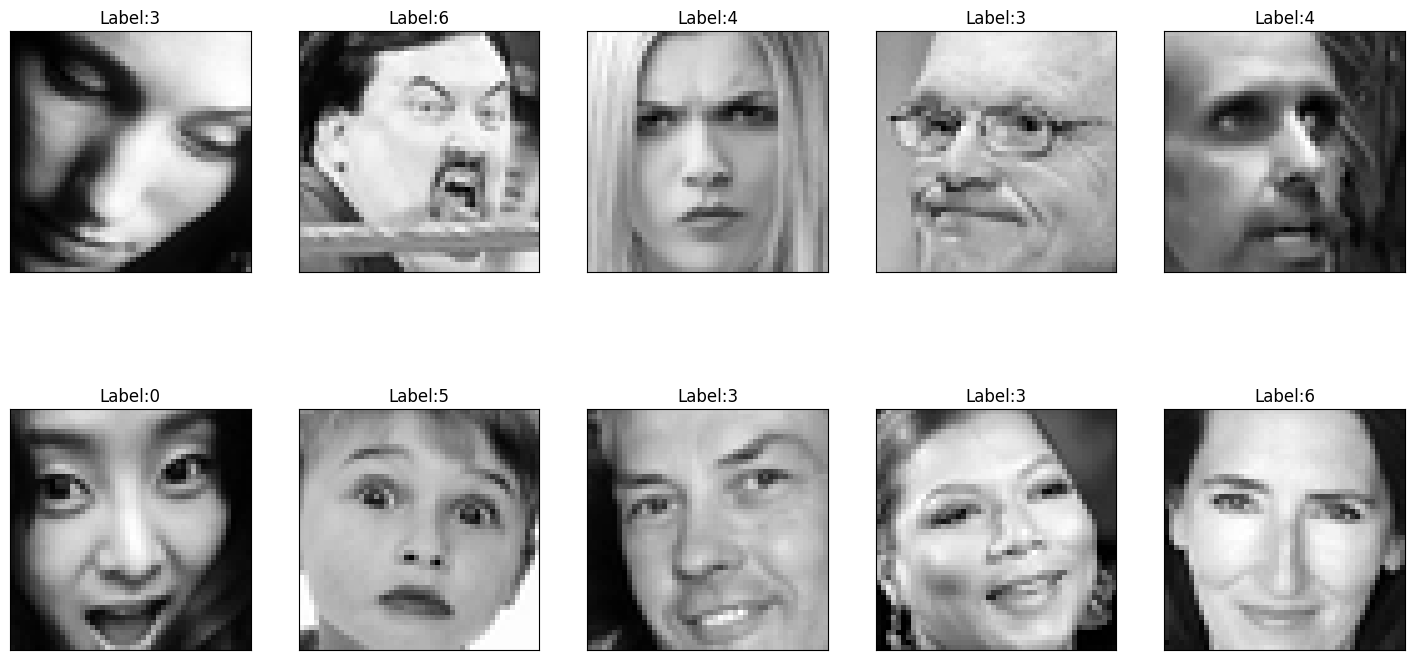

In [ ]:
y_pred = md_rfc_norm.predict(x_test_norm)
x_test = x_test_norm.reshape(-1, 48, 48)
show_img(x_test, y_pred)

In [ ]:
# Predict on the test set
y_test_pred = md_rfc_norm.predict(x_test_norm)

# Evaluate the model
test_accuracy = accuracy_score(y_test_norm, y_test_pred)
print("Test Classification Report:")
print(classification_report(y_test_norm, y_test_pred))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.12      0.19       485
           1       0.50      0.02      0.03        57
           2       0.32      0.18      0.23       482
           3       0.43      0.80      0.56       854
           4       0.35      0.37      0.36       594
           5       0.65      0.44      0.53       351
           6       0.38      0.36      0.37       587

    accuracy                           0.42      3410
   macro avg       0.44      0.33      0.33      3410
weighted avg       0.42      0.42      0.38      3410



As we can see from the classification report above, the most accurate is label 3 (the majority class) and the most errors is label 1 (the minority class). This can be predicted because when there is a large disparity in the number of instances per class, the model may tend to perform better on the majority class while struggling with the minority classes.

### Draw predict lables using Random Forest Classifier

In [ ]:
# load model
import pickle
md_rfc_norm = pickle.load(open("/kaggle/input/dataset/md_rfc_norm.sav", "rb"))
md_rfc_pca = pickle.load(open("/kaggle/input/dataset/md_rfc_pca.sav", "rb"))

y_val_pred_norm = md_rfc_norm.predict(x_val_norm)
y_val_pred_pca = md_rfc_pca.predict(x_val_pca)
x_val_norm3d = x_val_norm.reshape(x_val_norm.shape[0], 48, 48)

Show images with original labels and predictive labels on validation dataset

Original dataset


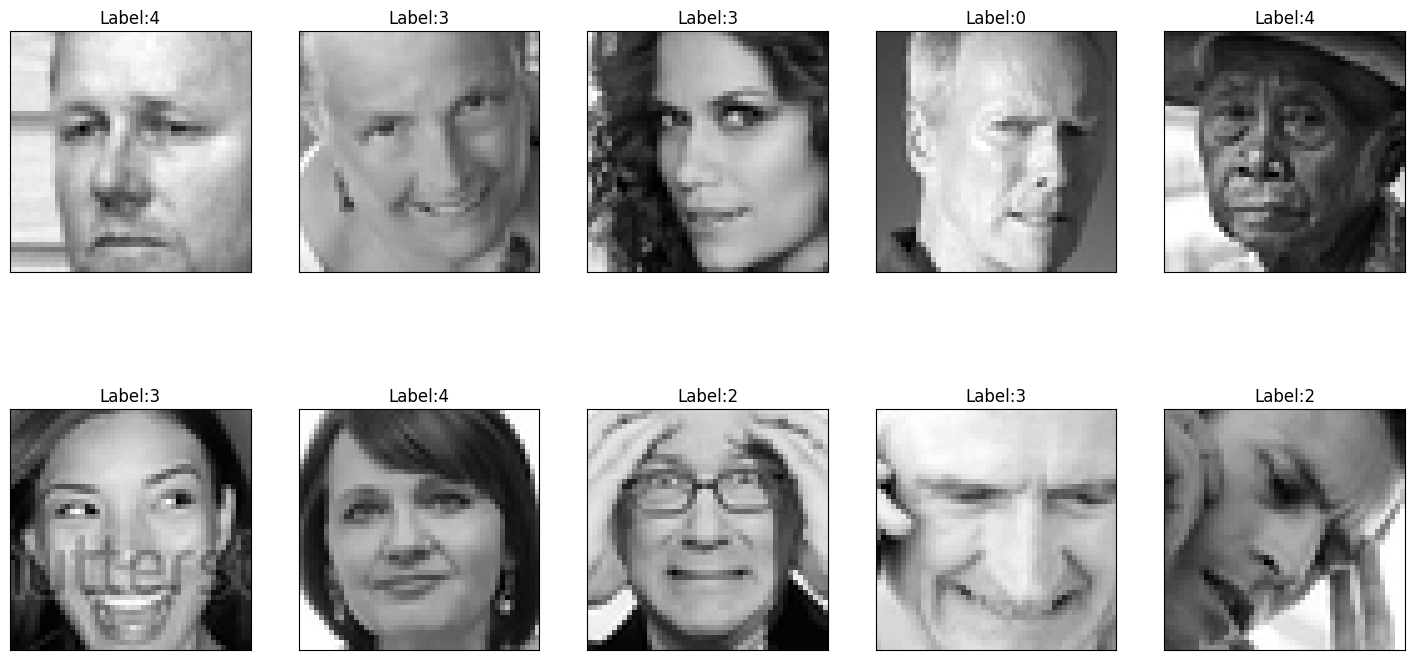

In [ ]:
print("Original dataset")
show_img(x_val_norm3d, y_val_norm)

Predict base on original dataset


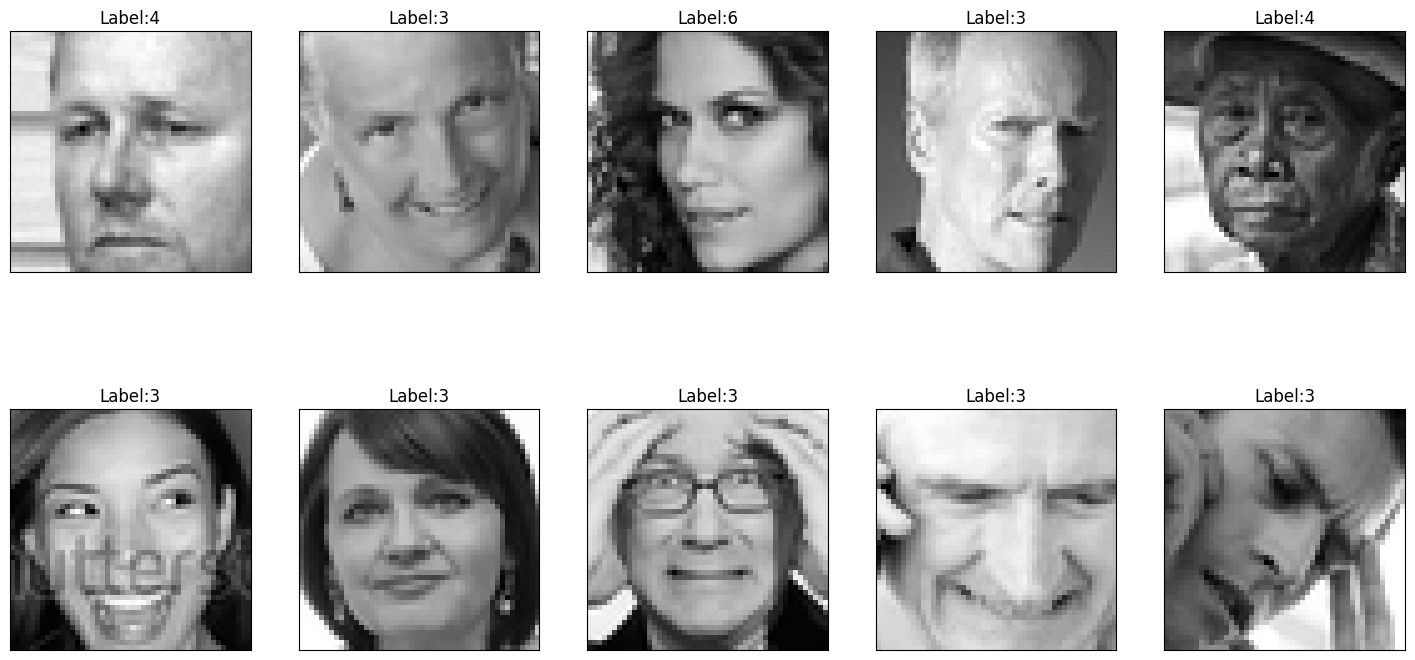

In [ ]:
print("Predict base on original dataset")
show_img(x_val_norm3d, y_val_pred_norm)

Predict base on transformed dataset


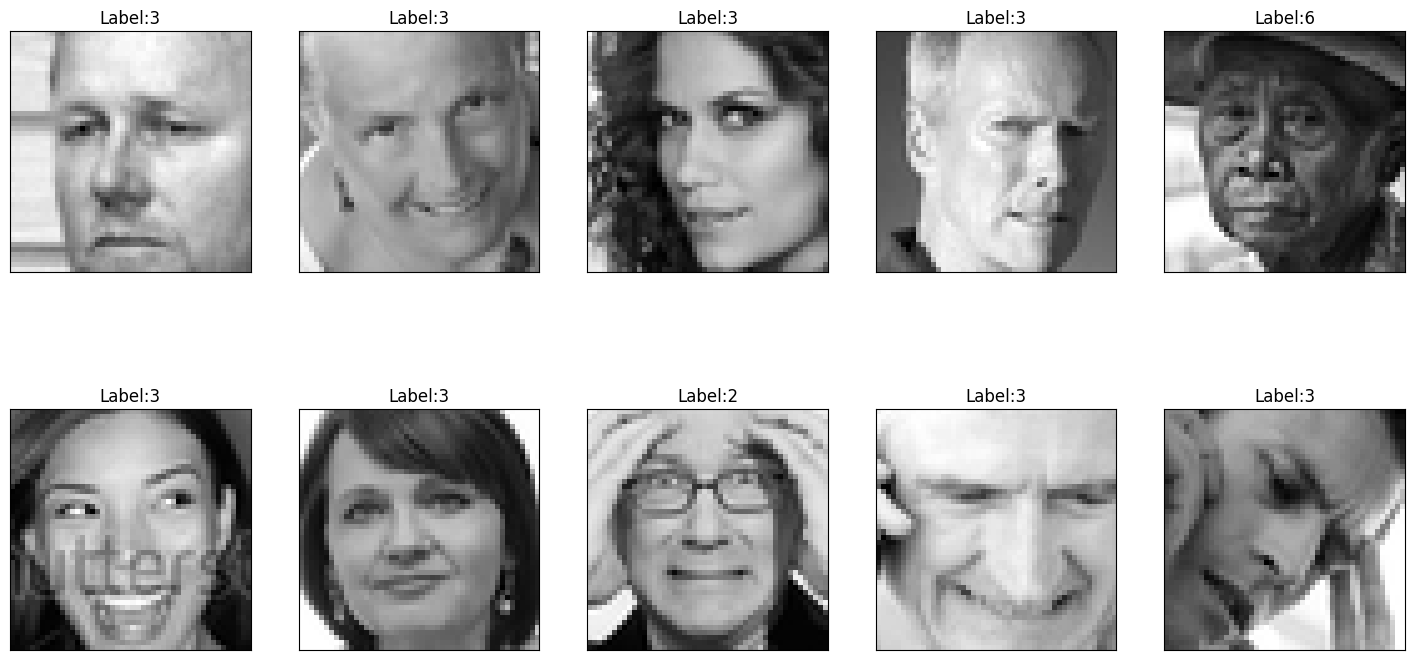

In [ ]:
print("Predict base on transformed dataset")
show_img(x_val_norm3d, y_val_pred_pca)

Labels 1: Original VS Predictive

Original dataset


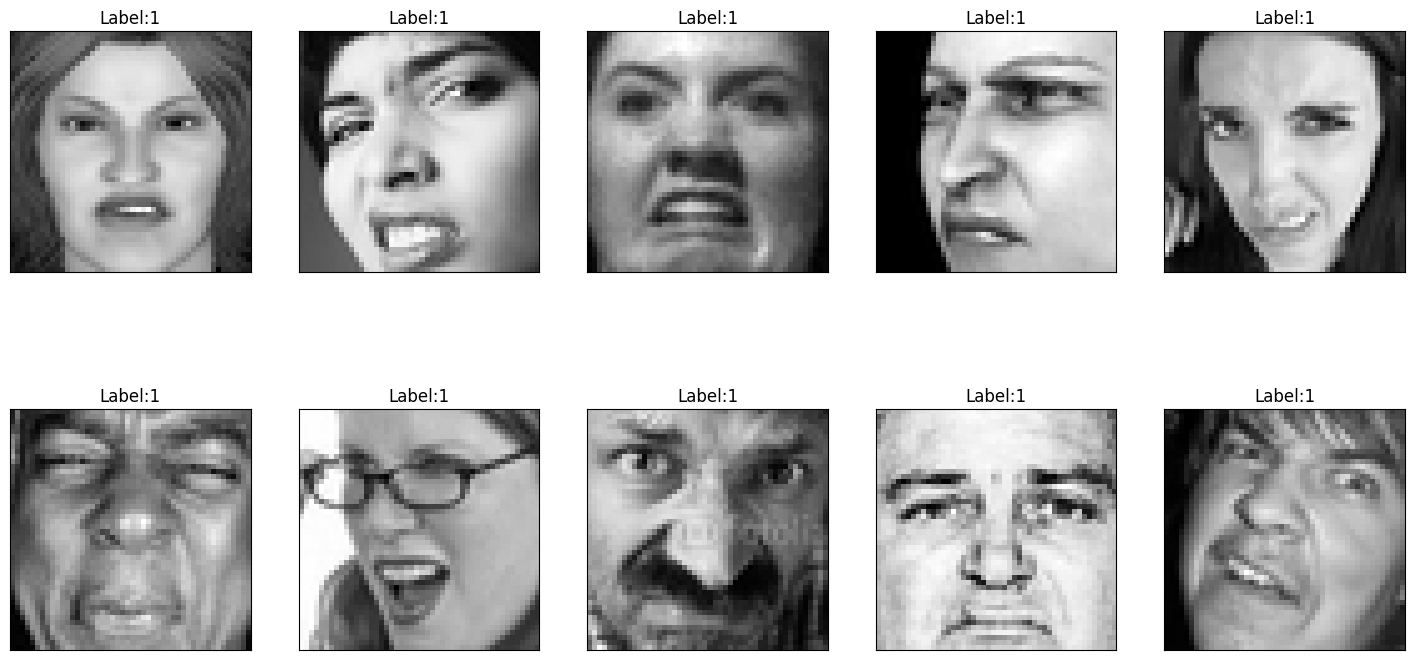

In [ ]:
indices_1 = np.where(y_val_norm == 1) 
print("Original dataset")
show_img(x_val_norm3d[indices_1], y_val_norm[indices_1])

Predict base on original dataset


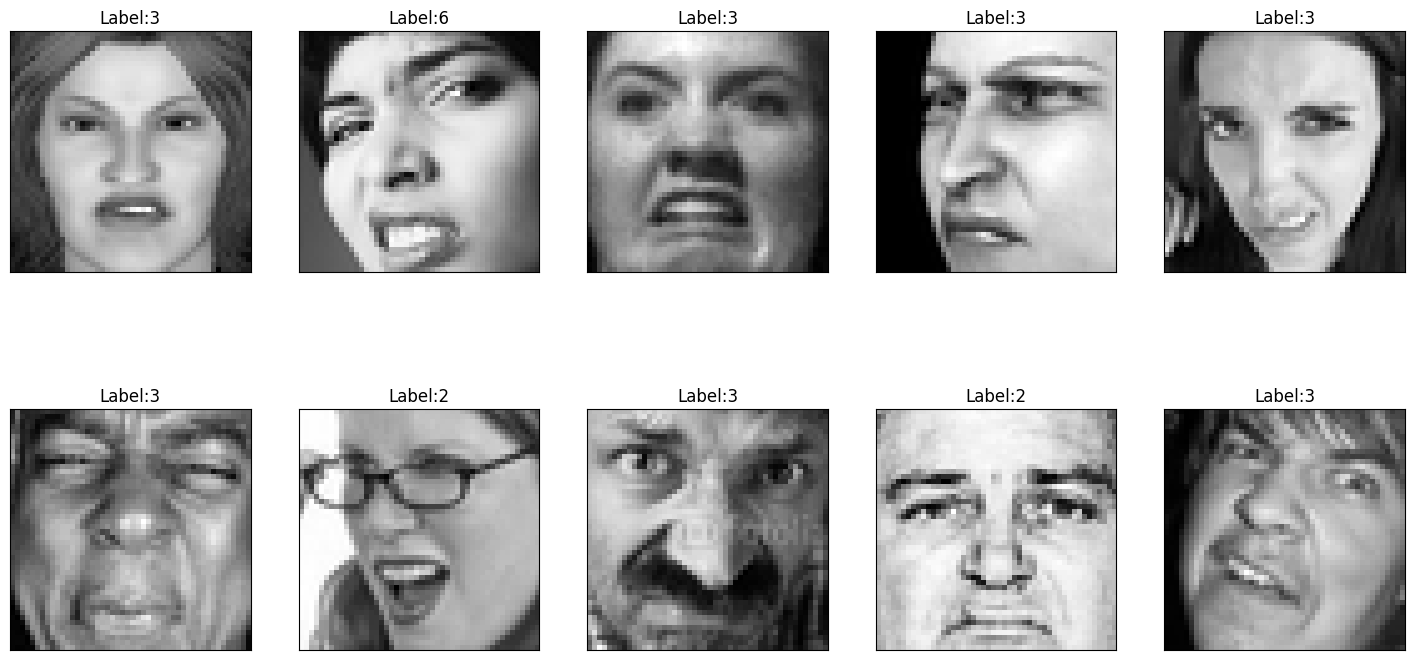

In [ ]:
show_img(x_val_norm3d[indices_1], y_val_pred_norm[indices_1])
print("Predict base on original dataset")

Predict on transformed dataset


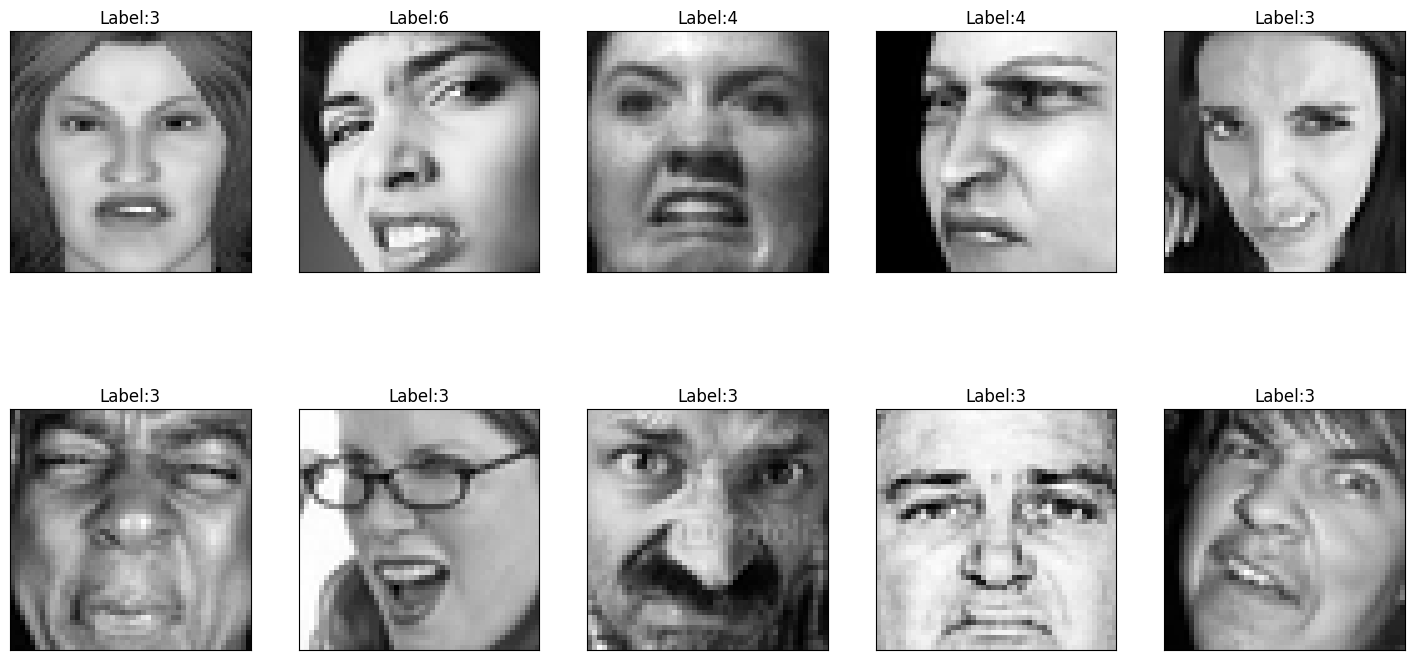

In [ ]:
print("Predict base on transformed dataset")
show_img(x_val_norm3d[indices_1], y_val_pred_pca[indices_1])

Labels 3: Original VS Predictive

Original dataset


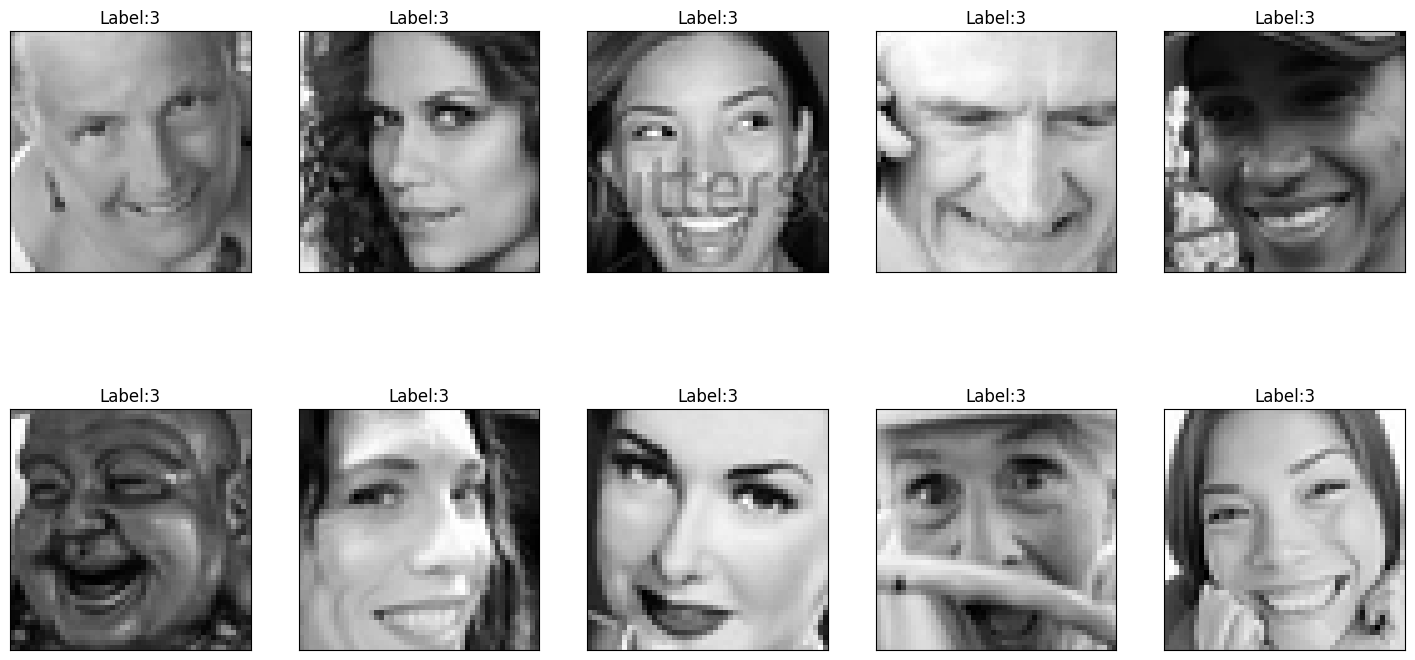

In [ ]:
indices_3 = np.where(y_val_norm == 3) 
print("Original dataset")
show_img(x_val_norm3d[indices_3], y_val_norm[indices_3])

Predict base on original dataset


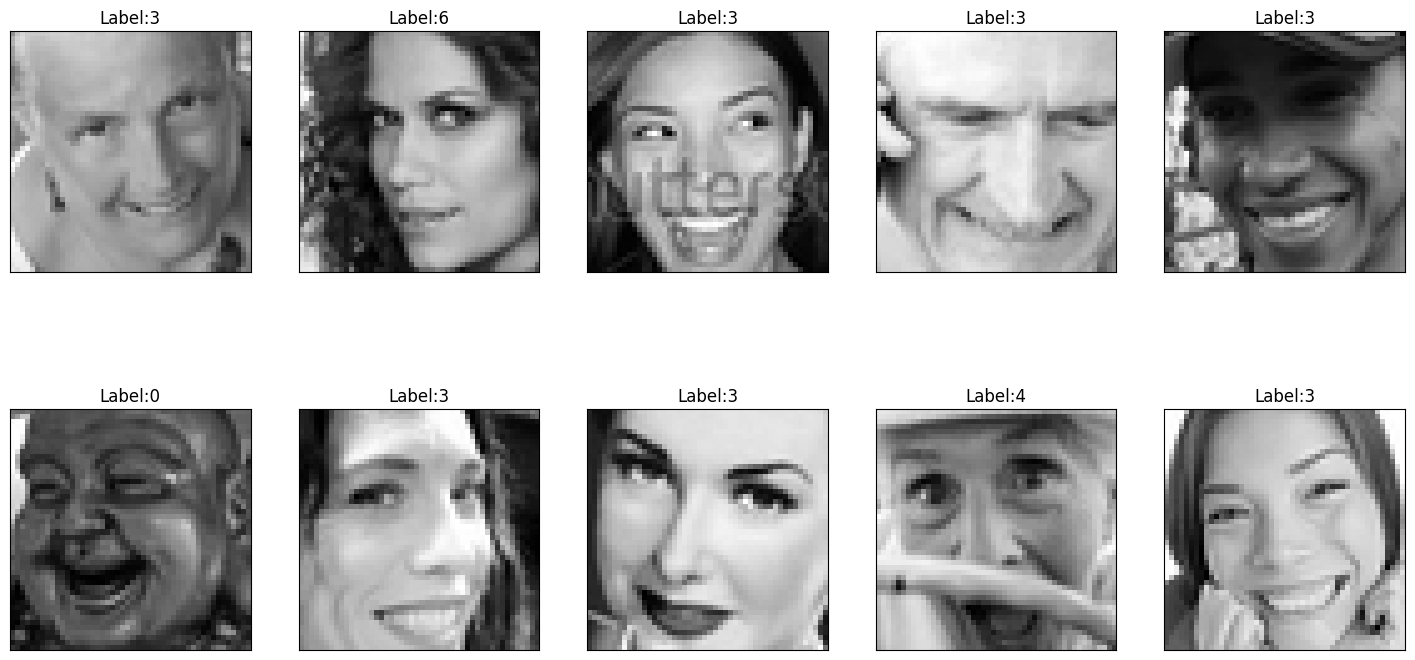

In [ ]:
print("Predict base on original dataset")
show_img(x_val_norm3d[indices_3], y_val_pred_norm[indices_3])

Predict base on transformed dataset


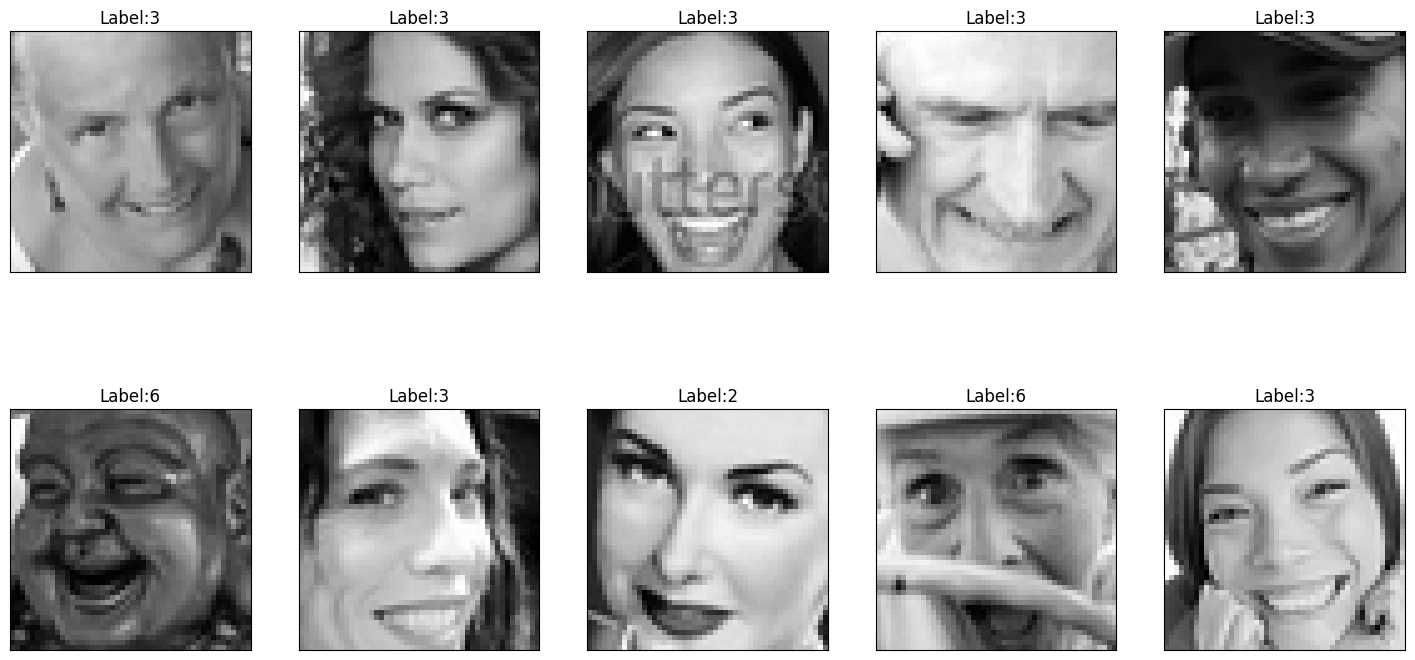

In [ ]:
print("Predict base on transformed dataset")
show_img(x_val_norm3d[indices_3], y_val_pred_pca[indices_3])